In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import cupy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.data_splitting import train_val_test_split, one_hot_encode
from src.models import plot_loss, NeuralNetwork, linear_schedule, exponential_schedule
from src.metrics import evaluate

X_images = np.load("X_images.npy")
y_images = np.load("y_images.npy")


### Análisis y Preprocesamiento de Datos

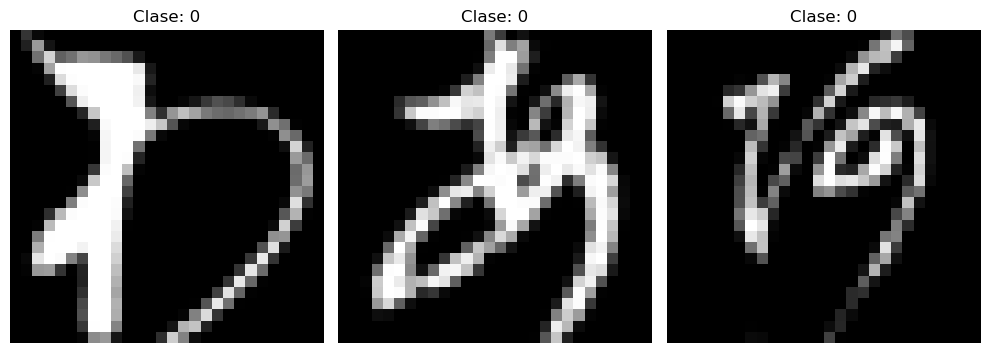

In [19]:
def plot_images(X, y, n=3):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(X[i].reshape(28, 28).get(), cmap="gray")
        plt.title(f"Clase: {y[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_images(X_images, y_images)

X_images = X_images / 255.0

# División
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X_images, y_images)


Valores faltantes por columna:
0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

Estadísticas descriptivas:
               0            1            2            3            4    \
count  3500.000000  3500.000000  3500.000000  3500.000000  3500.000000   
mean      0.001327     0.003036     0.007057     0.010989     0.014815   
std       0.026668     0.038574     0.068032     0.083587     0.095553   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.788235     0.945098     1.000000     1.000000     1.000000   

               5            6            7            8            9    ...  \
count  3500.000000  3500.000000  3500.000000  3500.000000  3500.000000

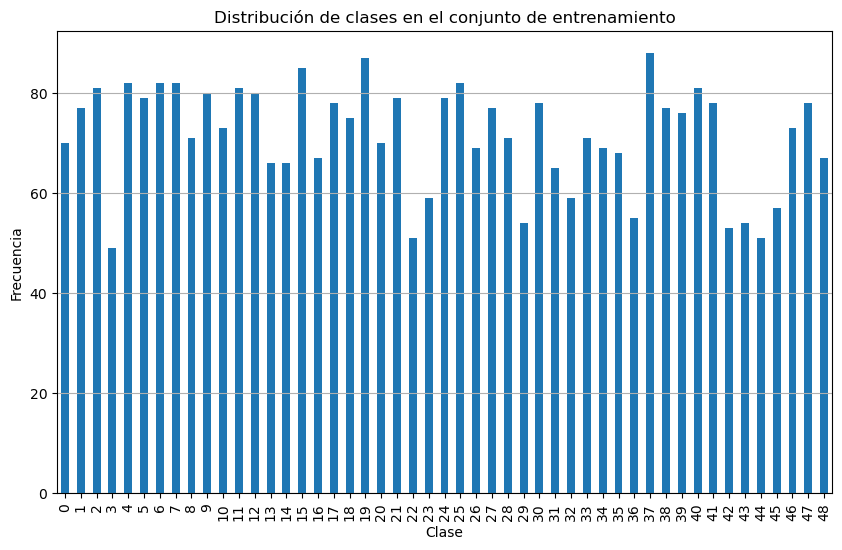

In [20]:
# Verificar valores faltantes
df_preds = pd.DataFrame(X_train.get())
missing_values = df_preds.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Estadísticas descriptivas para detectar outliers
stats = df_preds.describe()
print("\nEstadísticas descriptivas:")
print(stats)

# Verificar desbalanceo de clases
class_counts = pd.Series(y_train.get()).value_counts()
print("\nDistribución de clases en el conjunto de entrenamiento:")
print(class_counts)

plt.figure(figsize=(10, 6))
class_counts.sort_index().plot(kind='bar')
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.grid(axis='y')
plt.show()

Parece un dataset bastante parejo y no necesita preprocesamiento.

### Implementación y Entrenamiento de una Red Neuronal Básica

Epoch 0: Train Loss = 4.0633, Val Loss = 4.0637, LR = 0.010000
Epoch 10: Train Loss = 4.0067, Val Loss = 4.0085, LR = 0.010000
Epoch 20: Train Loss = 3.9656, Val Loss = 3.9686, LR = 0.010000
Epoch 30: Train Loss = 3.9330, Val Loss = 3.9376, LR = 0.010000
Epoch 40: Train Loss = 3.9060, Val Loss = 3.9126, LR = 0.010000
Epoch 50: Train Loss = 3.8831, Val Loss = 3.8911, LR = 0.010000
Epoch 60: Train Loss = 3.8626, Val Loss = 3.8722, LR = 0.010000
Epoch 70: Train Loss = 3.8440, Val Loss = 3.8549, LR = 0.010000
Epoch 80: Train Loss = 3.8267, Val Loss = 3.8390, LR = 0.010000
Epoch 90: Train Loss = 3.8104, Val Loss = 3.8240, LR = 0.010000
Epoch 100: Train Loss = 3.7947, Val Loss = 3.8096, LR = 0.010000
Epoch 110: Train Loss = 3.7795, Val Loss = 3.7956, LR = 0.010000
Epoch 120: Train Loss = 3.7646, Val Loss = 3.7818, LR = 0.010000
Epoch 130: Train Loss = 3.7498, Val Loss = 3.7684, LR = 0.010000
Epoch 140: Train Loss = 3.7350, Val Loss = 3.7551, LR = 0.010000
Epoch 150: Train Loss = 3.7203, Val 

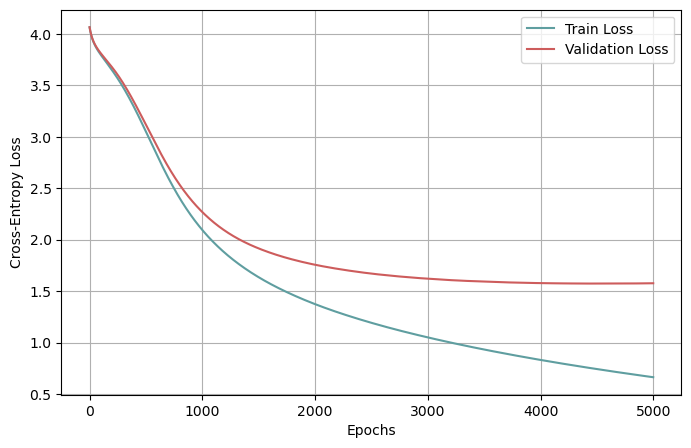

In [21]:
num_classes = len(np.unique(y_train))
y_train_oh = one_hot_encode(y_train, num_classes)
y_val_oh = one_hot_encode(y_val, num_classes)

input_dim = X_train.shape[1]
output_dim = num_classes

model_M0 = NeuralNetwork(layer_sizes=[input_dim, 100, 80, output_dim], learning_rate=0.01)
history = model_M0.train(X_train, y_train_oh, X_val, y_val_oh, epochs=5000)

plot_loss(history)

### Resultados en Train

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.852857 |
| Cross-Entropy | 0.663799 |

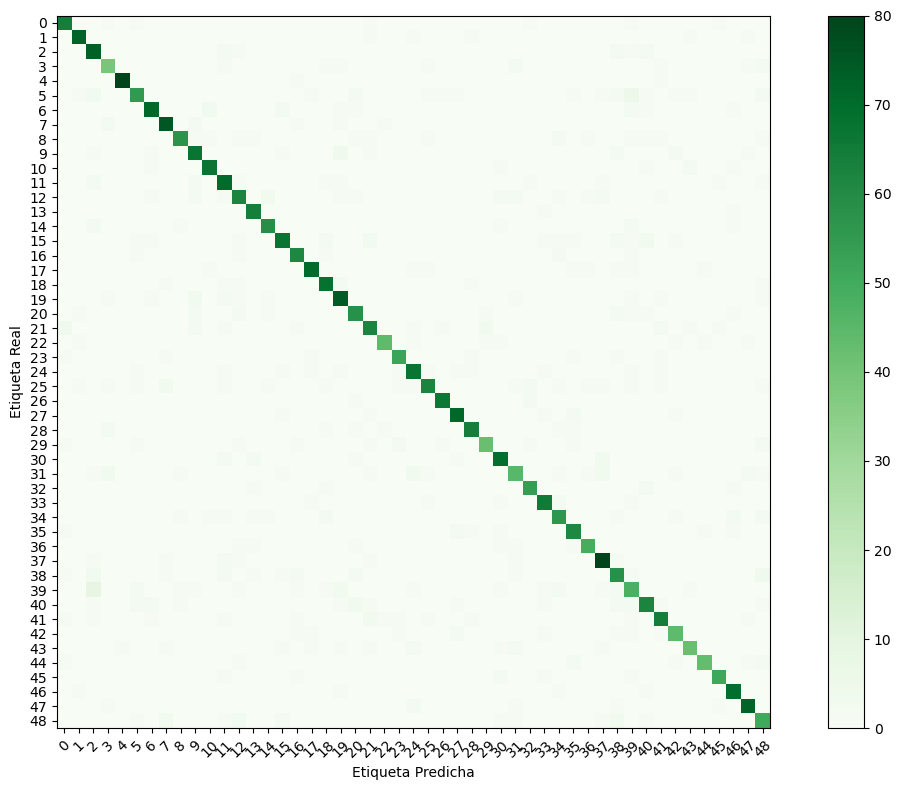

### Resultados en Validation

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.605333 |
| Cross-Entropy | 1.57672  |

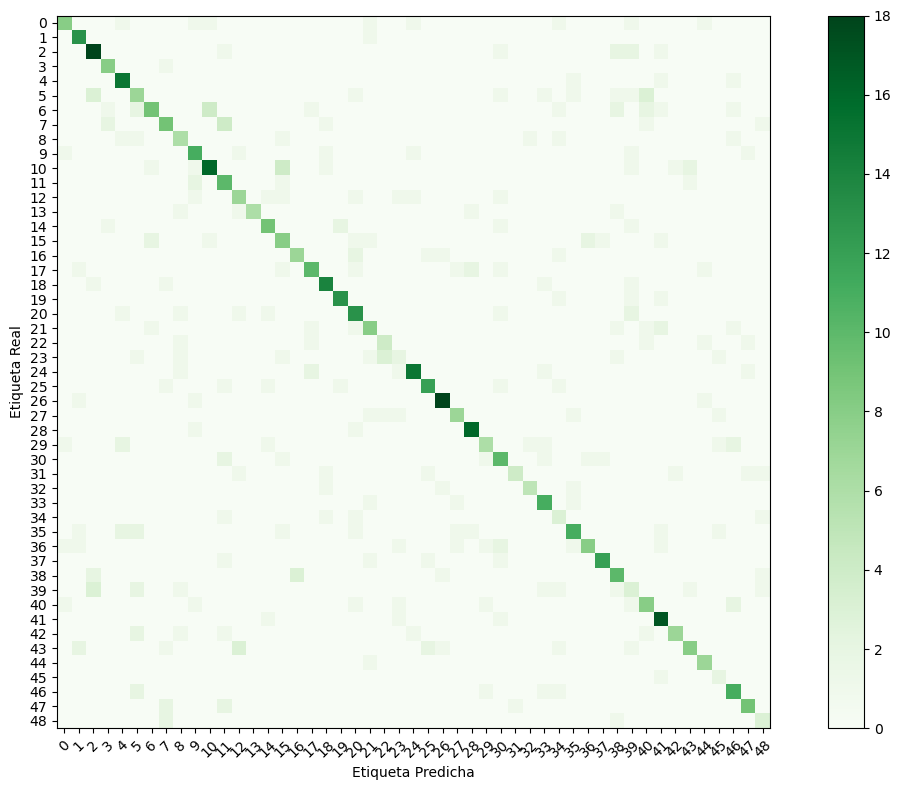

In [22]:
acc_train, loss_train, cm_train = evaluate(model_M0, X_train, y_train_oh,title="Train")
acc_val, loss_val, cm_val = evaluate(model_M0, X_val, y_val_oh,title="Validation")


### 3 Implementación y Entrenamiento de una Red Neuronal Avanzada

#### Implementar las siguientes mejoras al algoritmo de entrenamiento, y para cada una reportar el efecto observado sobre el tiempo de #### entrenamiento y la performance del modelo resultante.
##### – Rate scheduling lineal (con saturación) y exponencial.


Epoch 0: Train Loss = 4.0633, Val Loss = 4.0505, LR = 0.030000
Epoch 10: Train Loss = 3.9325, Val Loss = 3.9317, LR = 0.029710
Epoch 20: Train Loss = 3.8632, Val Loss = 3.8691, LR = 0.029420
Epoch 30: Train Loss = 3.8122, Val Loss = 3.8227, LR = 0.029130
Epoch 40: Train Loss = 3.7680, Val Loss = 3.7823, LR = 0.028840
Epoch 50: Train Loss = 3.7258, Val Loss = 3.7443, LR = 0.028550
Epoch 60: Train Loss = 3.6837, Val Loss = 3.7064, LR = 0.028260
Epoch 70: Train Loss = 3.6408, Val Loss = 3.6677, LR = 0.027970
Epoch 80: Train Loss = 3.5968, Val Loss = 3.6272, LR = 0.027680
Epoch 90: Train Loss = 3.5511, Val Loss = 3.5845, LR = 0.027390
Epoch 100: Train Loss = 3.5035, Val Loss = 3.5393, LR = 0.027100
Epoch 110: Train Loss = 3.4538, Val Loss = 3.4920, LR = 0.026810
Epoch 120: Train Loss = 3.4023, Val Loss = 3.4433, LR = 0.026520
Epoch 130: Train Loss = 3.3492, Val Loss = 3.3930, LR = 0.026230
Epoch 140: Train Loss = 3.2948, Val Loss = 3.3414, LR = 0.025940
Epoch 150: Train Loss = 3.2390, Val 

### Resultados en Dataset

| Métrica       |   Valor |
|:--------------|--------:|
| Accuracy      | 0.628   |
| Cross-Entropy | 1.60308 |

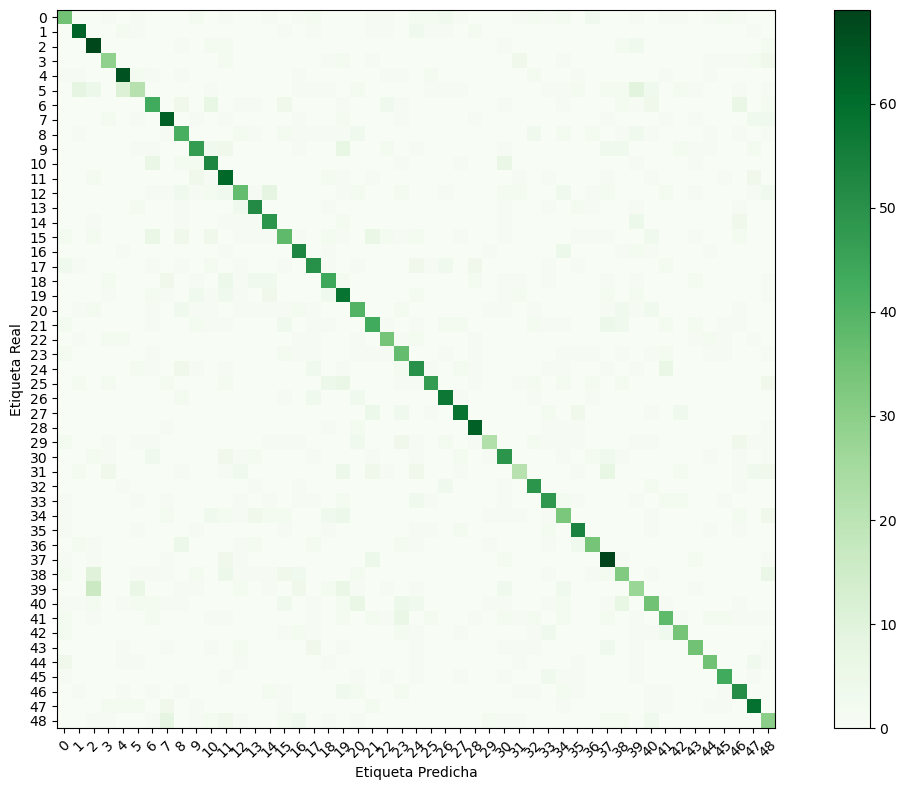

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.526667 |
| Cross-Entropy | 1.89403  |

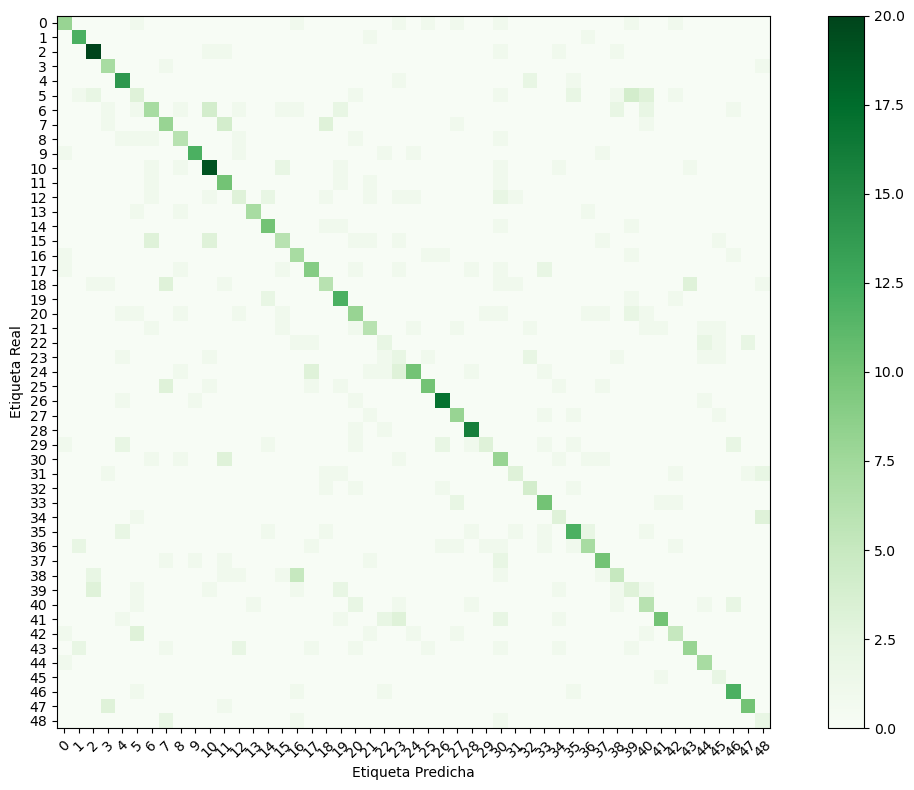

Epoch 0: Train Loss = 4.0633, Val Loss = 4.0505, LR = 0.030000
Epoch 10: Train Loss = 3.9341, Val Loss = 3.9334, LR = 0.028533
Epoch 20: Train Loss = 3.8675, Val Loss = 3.8735, LR = 0.027138
Epoch 30: Train Loss = 3.8202, Val Loss = 3.8305, LR = 0.025812
Epoch 40: Train Loss = 3.7810, Val Loss = 3.7948, LR = 0.024550
Epoch 50: Train Loss = 3.7455, Val Loss = 3.7627, LR = 0.023349
Epoch 60: Train Loss = 3.7120, Val Loss = 3.7327, LR = 0.022208
Epoch 70: Train Loss = 3.6796, Val Loss = 3.7037, LR = 0.021122
Epoch 80: Train Loss = 3.6481, Val Loss = 3.6754, LR = 0.020089
Epoch 90: Train Loss = 3.6175, Val Loss = 3.6476, LR = 0.019107
Epoch 100: Train Loss = 3.5874, Val Loss = 3.6200, LR = 0.018173
Epoch 110: Train Loss = 3.5579, Val Loss = 3.5925, LR = 0.017285
Epoch 120: Train Loss = 3.5288, Val Loss = 3.5652, LR = 0.016440
Epoch 130: Train Loss = 3.5003, Val Loss = 3.5383, LR = 0.015636
Epoch 140: Train Loss = 3.4723, Val Loss = 3.5118, LR = 0.014871
Epoch 150: Train Loss = 3.4449, Val 

### Resultados en Train

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.366571 |
| Cross-Entropy | 2.82671  |

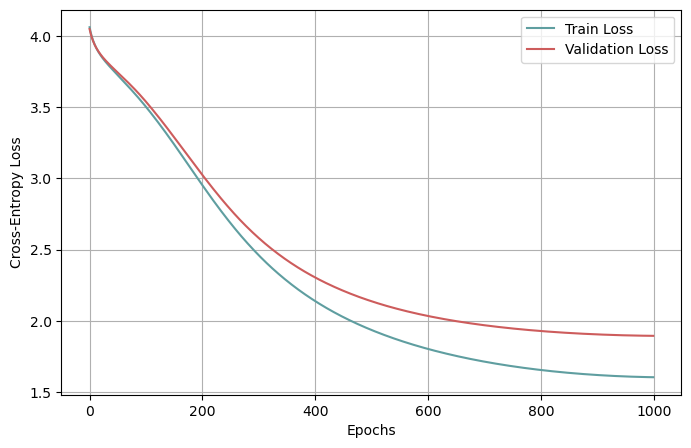

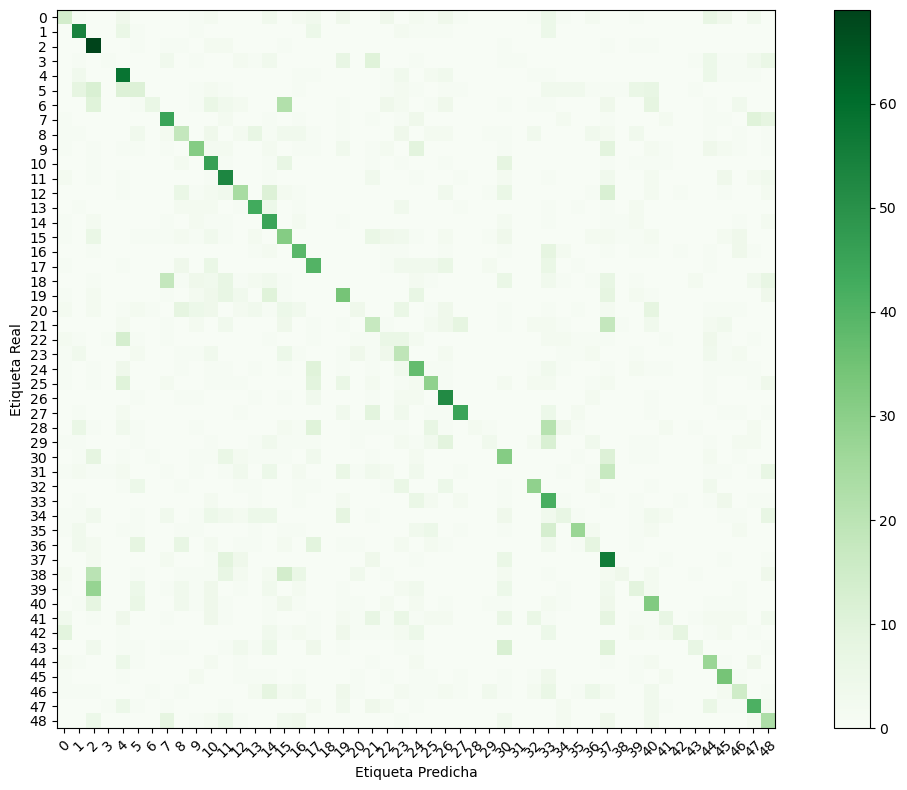

### Resultados en Validation

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.322667 |
| Cross-Entropy | 2.91457  |

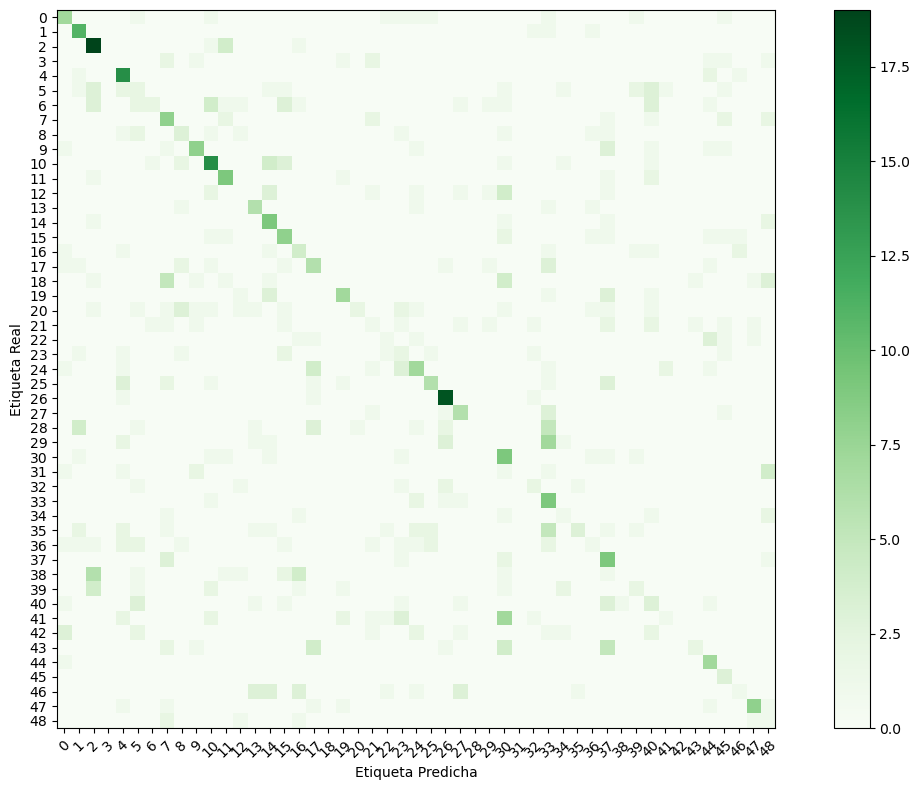

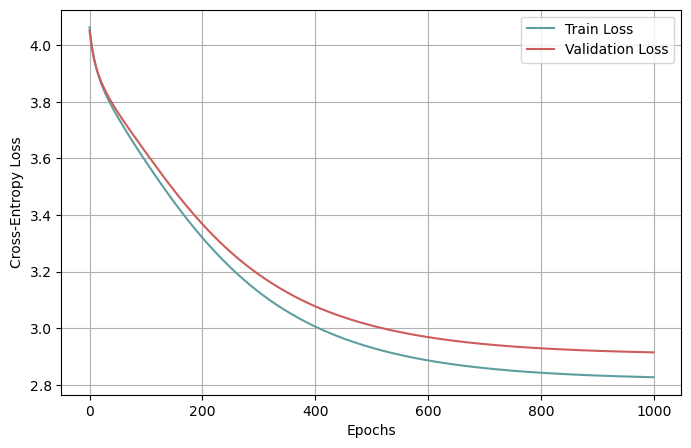

In [23]:
model_M1 = NeuralNetwork(layer_sizes=[input_dim, 100, 80, output_dim], learning_rate=0.03)

#  Lineal con saturación
scheduler = lambda epoch: linear_schedule(epoch, initial_lr=0.03, final_lr=0.001, saturate_epoch=1000)

history = model_M1.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=1000,
    use_scheduler=True,
    scheduler_fn=scheduler
)

acc_train_M1, loss_train_M1, cm_train_M1 = evaluate(model_M1, X_train, y_train_oh)
acc_val_M1, loss_val_M1, cm_val_M1 = evaluate(model_M1, X_val, y_val_oh)
plot_loss(history)

# Crear el modelo
model_exp = NeuralNetwork(layer_sizes=[input_dim, 100, 80, output_dim], learning_rate=0.03)

# Definir el scheduler
scheduler_fn = exponential_schedule(initial_lr=0.03, gamma=0.995)

# Entrenar
history_exp = model_exp.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=1000,
    use_scheduler=True,
    scheduler_fn=scheduler_fn,
    verbose=True
)

# Evaluar el modelo
acc_train_exp, loss_train_exp, cm_train_exp = evaluate(model_exp, X_train, y_train_oh,title="Train")
acc_val_exp, loss_val_exp, cm_val_exp = evaluate(model_exp, X_val, y_val_oh,title="Validation")
plot_loss(history_exp)

#### – Mini-batch stochastic gradient descent.

Epoch 0: Train Loss = 3.9418, Val Loss = 3.7990, LR = 0.010000
Epoch 10: Train Loss = 2.0081, Val Loss = 2.1259, LR = 0.010000
Epoch 20: Train Loss = 1.3589, Val Loss = 1.7407, LR = 0.010000
Epoch 30: Train Loss = 1.0410, Val Loss = 1.6179, LR = 0.010000
Epoch 40: Train Loss = 0.8166, Val Loss = 1.6098, LR = 0.010000
Epoch 50: Train Loss = 0.6383, Val Loss = 1.6122, LR = 0.010000
Epoch 60: Train Loss = 0.5034, Val Loss = 1.6465, LR = 0.010000
Epoch 70: Train Loss = 0.3914, Val Loss = 1.6596, LR = 0.010000
Epoch 80: Train Loss = 0.2989, Val Loss = 1.7021, LR = 0.010000
Epoch 90: Train Loss = 0.2328, Val Loss = 1.7326, LR = 0.010000
Epoch 100: Train Loss = 0.1815, Val Loss = 1.7891, LR = 0.010000
Epoch 110: Train Loss = 0.1428, Val Loss = 1.8407, LR = 0.010000
Epoch 120: Train Loss = 0.1146, Val Loss = 1.9023, LR = 0.010000
Epoch 130: Train Loss = 0.0934, Val Loss = 1.9442, LR = 0.010000
Epoch 140: Train Loss = 0.0774, Val Loss = 1.9825, LR = 0.010000
Epoch 150: Train Loss = 0.0651, Val 

### Resultados en Train

| Métrica       |     Valor |
|:--------------|----------:|
| Accuracy      | 1         |
| Cross-Entropy | 0.0312026 |

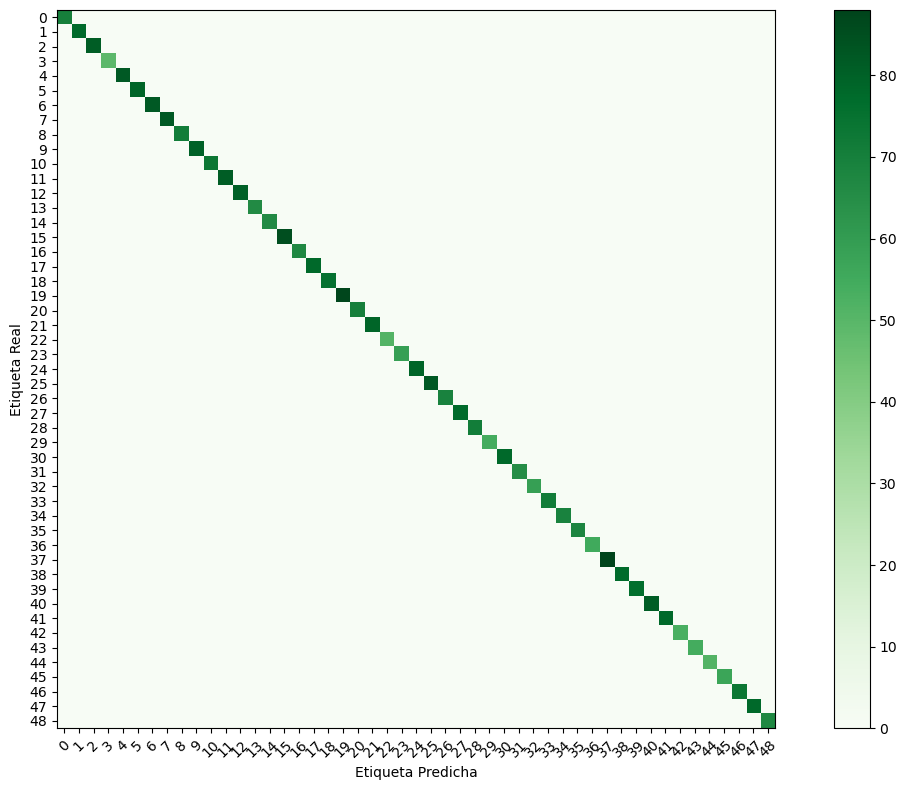

### Resultados en Validation

| Métrica       |   Valor |
|:--------------|--------:|
| Accuracy      | 0.616   |
| Cross-Entropy | 2.18597 |

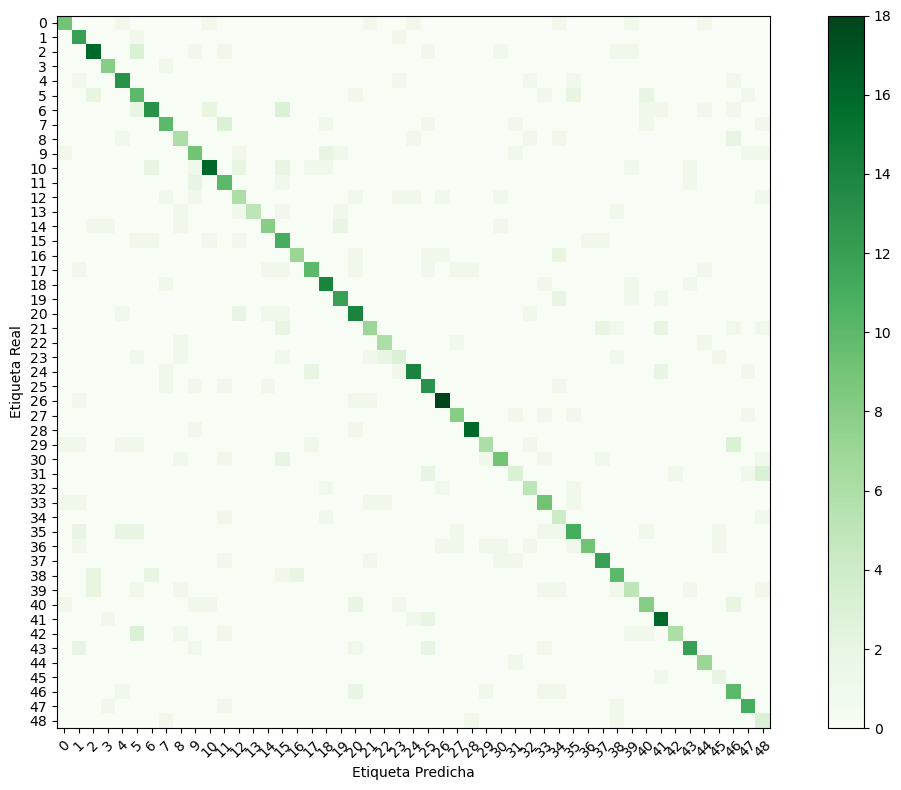

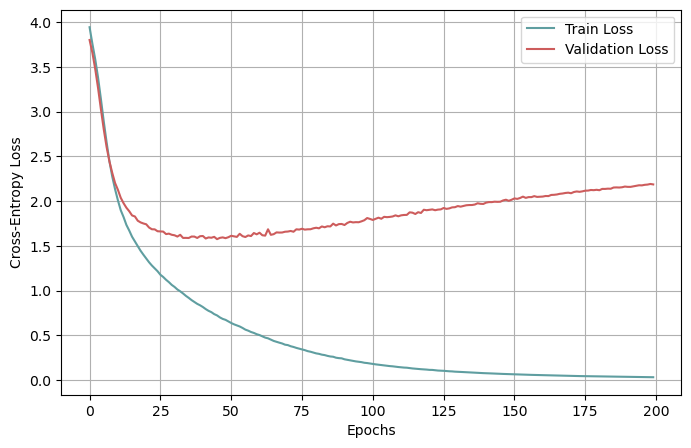

In [24]:
# Entrenamiento con Mini-Batch SGD
model_mini_batch = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.01
)

history_mini_batch = model_mini_batch.train(
    X_train,
    y_train_oh,
    X_val,
    y_val_oh,
    epochs=200,
    batch_size=32,
    verbose=True
)

evaluate(model_mini_batch, X_train, y_train_oh,title="Train")
evaluate(model_mini_batch, X_val, y_val_oh,title="Validation")

plot_loss(history_mini_batch)


Vemos que con MiniBatch converge muy rápido y ya con 50 epochs empieza a overfittear

#### – Optimizador ADAM.

Epoch 0: Train Loss = 4.0633, Val Loss = 3.9515, LR = 0.001000
Epoch 10: Train Loss = 3.4020, Val Loss = 3.3999, LR = 0.001000
Epoch 20: Train Loss = 2.6869, Val Loss = 2.7531, LR = 0.001000
Epoch 30: Train Loss = 2.0570, Val Loss = 2.2282, LR = 0.001000
Epoch 40: Train Loss = 1.6209, Val Loss = 1.9250, LR = 0.001000
Epoch 50: Train Loss = 1.3058, Val Loss = 1.7510, LR = 0.001000
Epoch 60: Train Loss = 1.0705, Val Loss = 1.6652, LR = 0.001000
Epoch 70: Train Loss = 0.8843, Val Loss = 1.6132, LR = 0.001000
Epoch 80: Train Loss = 0.7325, Val Loss = 1.5817, LR = 0.001000
Epoch 90: Train Loss = 0.6045, Val Loss = 1.5765, LR = 0.001000
Epoch 99: Train Loss = 0.5058, Val Loss = 1.5862, LR = 0.001000


### Resultados en Train

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.901143 |
| Cross-Entropy | 0.495729 |

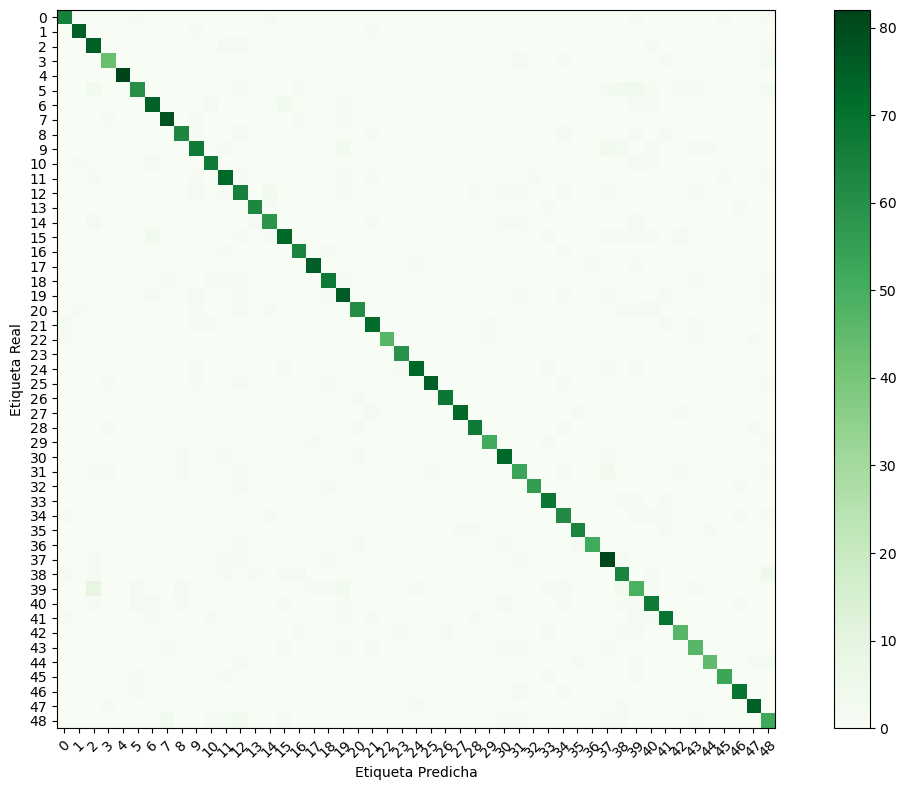

### Resultados en Validation

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.613333 |
| Cross-Entropy | 1.58622  |

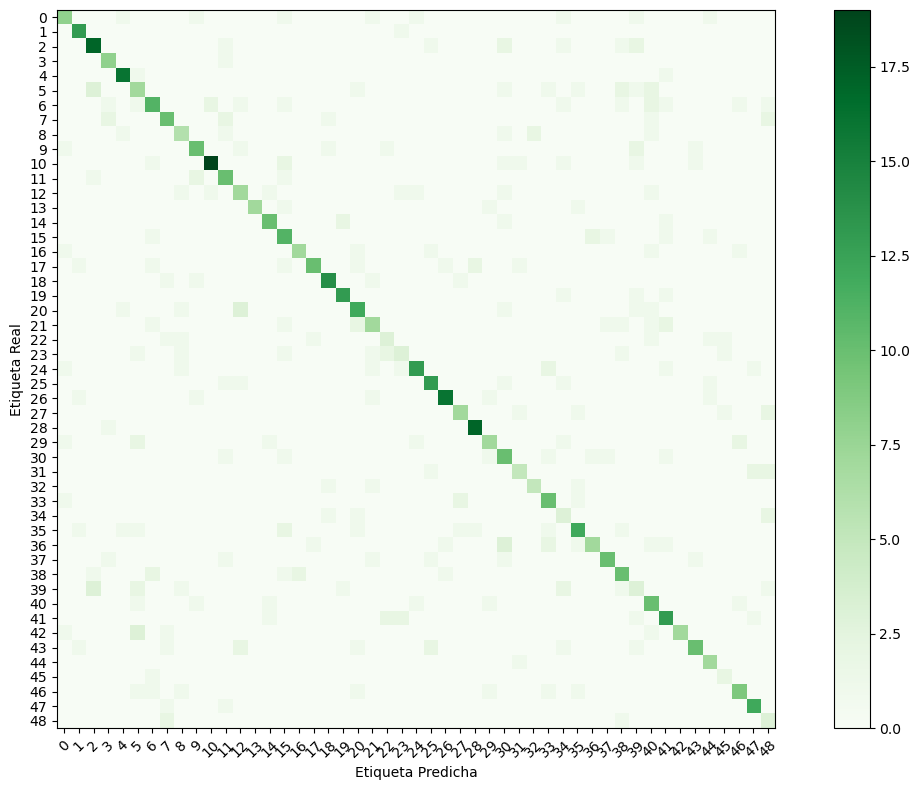

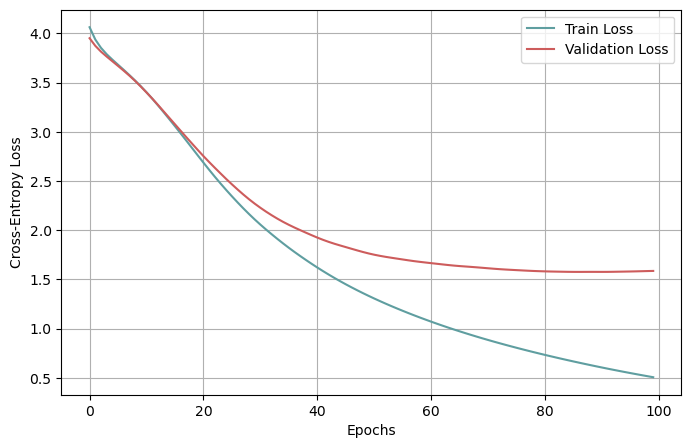

In [25]:
model_adam = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.001,
    use_adam=True
)

history_adam = model_adam.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=100,
    verbose=True
)

evaluate(model_adam, X_train, y_train_oh,title="Train")
evaluate(model_adam, X_val, y_val_oh,title="Validation")

plot_loss(history_adam)

Notamos que ADAM converge muy rapido y bastante estable.

#### – Regularización L2.

Epoch 0: Train Loss = 4.0633, Val Loss = 4.0637, LR = 0.010000
Epoch 10: Train Loss = 4.0068, Val Loss = 4.0085, LR = 0.010000
Epoch 20: Train Loss = 3.9657, Val Loss = 3.9686, LR = 0.010000
Epoch 30: Train Loss = 3.9331, Val Loss = 3.9376, LR = 0.010000
Epoch 40: Train Loss = 3.9061, Val Loss = 3.9126, LR = 0.010000
Epoch 50: Train Loss = 3.8831, Val Loss = 3.8911, LR = 0.010000
Epoch 60: Train Loss = 3.8627, Val Loss = 3.8722, LR = 0.010000
Epoch 70: Train Loss = 3.8440, Val Loss = 3.8549, LR = 0.010000
Epoch 80: Train Loss = 3.8268, Val Loss = 3.8390, LR = 0.010000
Epoch 90: Train Loss = 3.8104, Val Loss = 3.8240, LR = 0.010000
Epoch 100: Train Loss = 3.7948, Val Loss = 3.8096, LR = 0.010000
Epoch 110: Train Loss = 3.7796, Val Loss = 3.7956, LR = 0.010000
Epoch 120: Train Loss = 3.7647, Val Loss = 3.7818, LR = 0.010000
Epoch 130: Train Loss = 3.7499, Val Loss = 3.7684, LR = 0.010000
Epoch 140: Train Loss = 3.7351, Val Loss = 3.7551, LR = 0.010000
Epoch 150: Train Loss = 3.7203, Val 

### Resultados en Train

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.525429 |
| Cross-Entropy | 2.09389  |

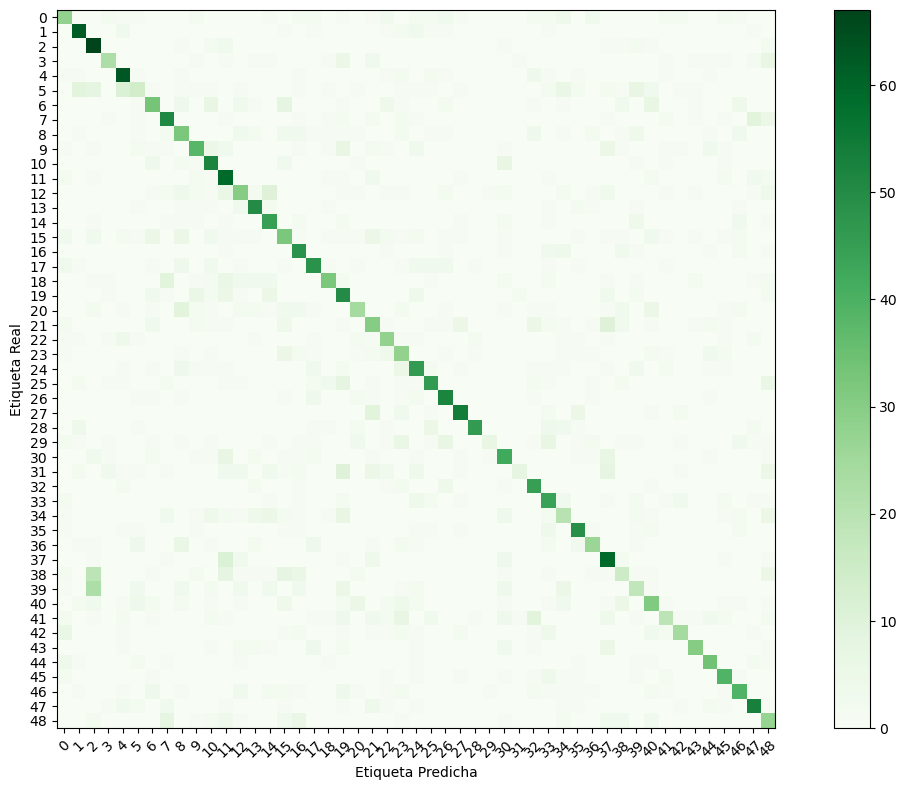

### Resultados en Validation

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.454667 |
| Cross-Entropy | 2.26911  |

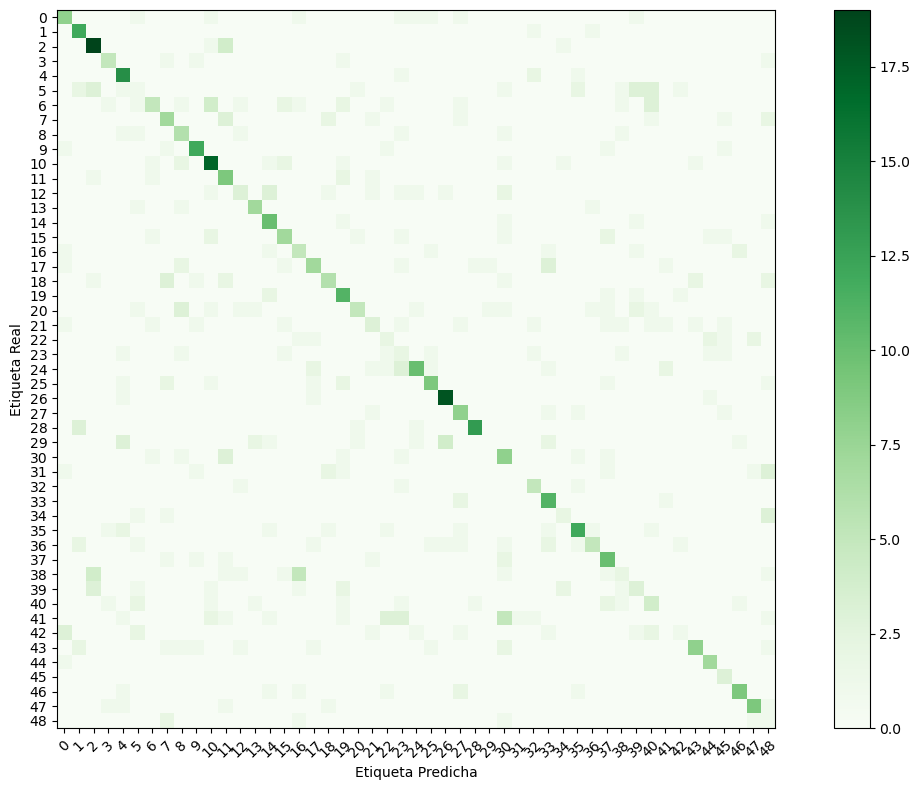

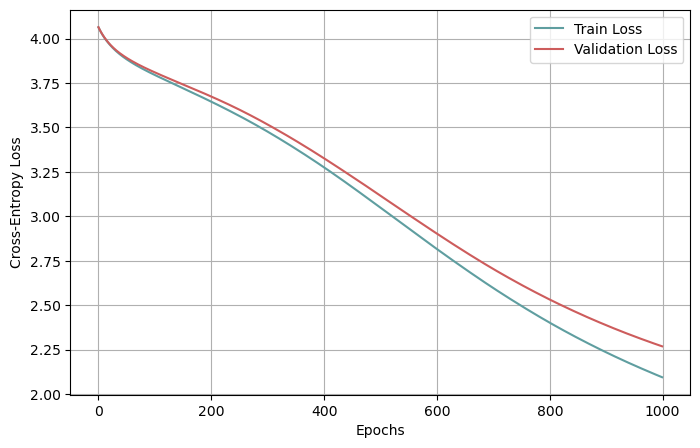

In [26]:
model_l2 = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.01,
    l2_lambda=0.001
)

history_l2 = model_l2.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=1000
)
evaluate(model_l2, X_train, y_train_oh,title="Train")
evaluate(model_l2, X_val, y_val_oh,title="Validation")

plot_loss(history_l2)

#### – Regularización mediante early stopping

Epoch 0: Train Loss = 4.0633, Val Loss = 4.0637, LR = 0.010000
Epoch 10: Train Loss = 4.0067, Val Loss = 4.0085, LR = 0.010000
Epoch 20: Train Loss = 3.9656, Val Loss = 3.9686, LR = 0.010000
Epoch 30: Train Loss = 3.9330, Val Loss = 3.9376, LR = 0.010000
Epoch 40: Train Loss = 3.9060, Val Loss = 3.9126, LR = 0.010000
Epoch 50: Train Loss = 3.8831, Val Loss = 3.8911, LR = 0.010000
Epoch 60: Train Loss = 3.8626, Val Loss = 3.8722, LR = 0.010000
Epoch 70: Train Loss = 3.8440, Val Loss = 3.8549, LR = 0.010000
Epoch 80: Train Loss = 3.8267, Val Loss = 3.8390, LR = 0.010000
Epoch 90: Train Loss = 3.8104, Val Loss = 3.8240, LR = 0.010000
Epoch 100: Train Loss = 3.7947, Val Loss = 3.8096, LR = 0.010000
Epoch 110: Train Loss = 3.7795, Val Loss = 3.7956, LR = 0.010000
Epoch 120: Train Loss = 3.7646, Val Loss = 3.7818, LR = 0.010000
Epoch 130: Train Loss = 3.7498, Val Loss = 3.7684, LR = 0.010000
Epoch 140: Train Loss = 3.7350, Val Loss = 3.7551, LR = 0.010000
Epoch 150: Train Loss = 3.7203, Val 

### Resultados en Train

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.821143 |
| Cross-Entropy | 0.77328  |

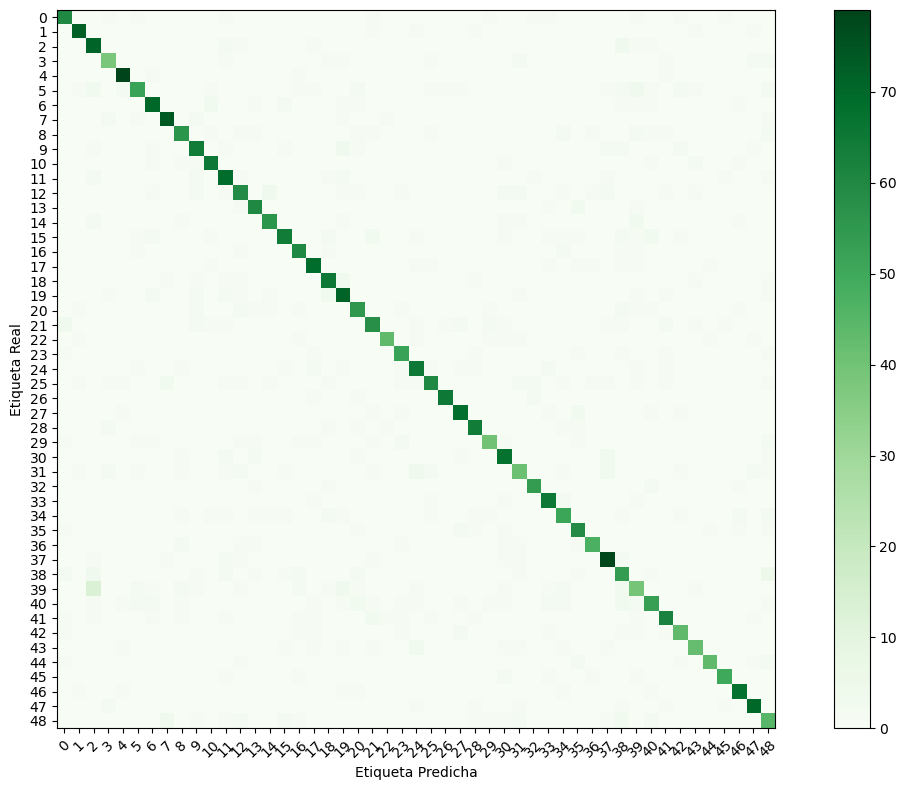

### Resultados en Validation

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.605333 |
| Cross-Entropy | 1.57437  |

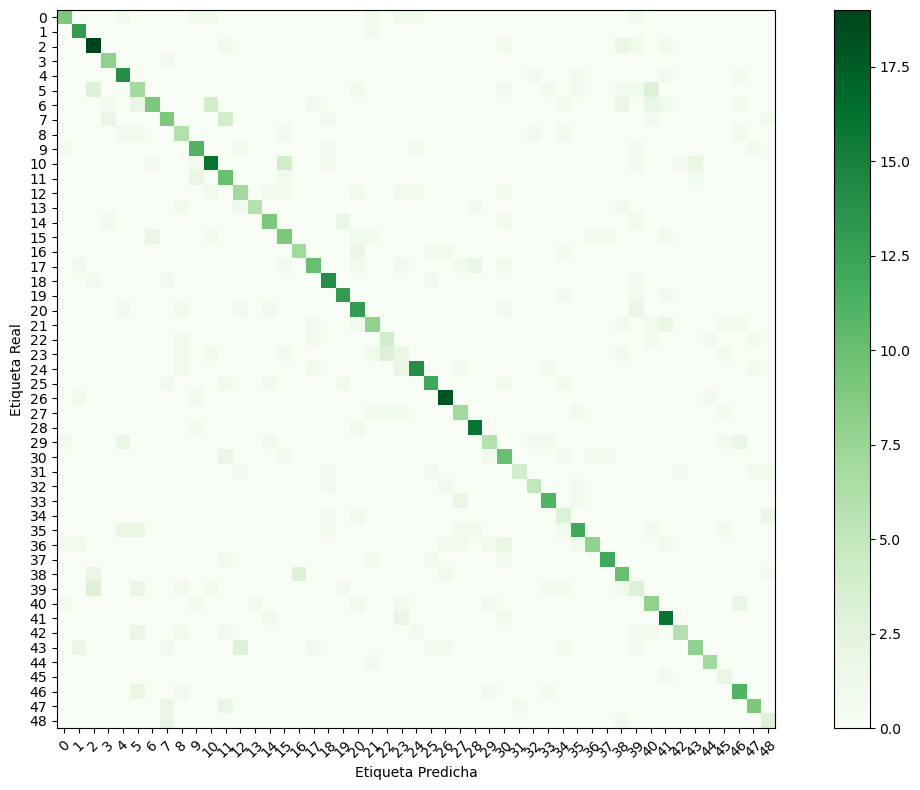

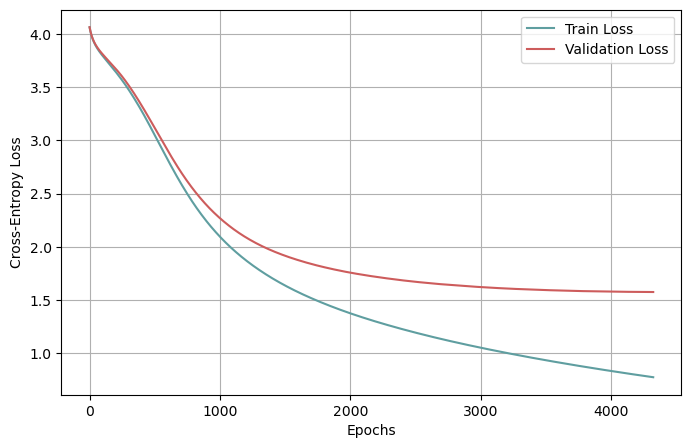

In [27]:
model_early = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.01
)

history_early = model_early.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=5000,
    early_stopping=True,
    patience=15,      # Se detiene si no mejora en 15 épocas
    min_delta=1e-4,   # Considera que mejora solo si mejora al menos esto
    verbose=True
)

evaluate(model_early, X_train, y_train_oh,title="Train")
evaluate(model_early, X_val, y_val_oh,title="Validation")

plot_loss(history_early)

Vemos que el Modelo Base dejaba de reducir la val loss en la Epoch 4322

#### Regularización mediante dropout

Epoch 0: Train Loss = 4.2556, Val Loss = 4.2390, LR = 0.010000
Epoch 10: Train Loss = 4.1473, Val Loss = 4.1450, LR = 0.010000
Epoch 20: Train Loss = 4.0629, Val Loss = 4.0722, LR = 0.010000
Epoch 30: Train Loss = 4.0366, Val Loss = 4.0479, LR = 0.010000
Epoch 40: Train Loss = 4.0103, Val Loss = 3.9786, LR = 0.010000
Epoch 50: Train Loss = 3.9674, Val Loss = 3.9869, LR = 0.010000
Epoch 60: Train Loss = 3.9495, Val Loss = 3.9557, LR = 0.010000
Epoch 70: Train Loss = 3.9290, Val Loss = 3.9423, LR = 0.010000
Epoch 80: Train Loss = 3.9339, Val Loss = 3.9297, LR = 0.010000
Epoch 90: Train Loss = 3.9113, Val Loss = 3.9323, LR = 0.010000
Epoch 100: Train Loss = 3.8932, Val Loss = 3.9201, LR = 0.010000
Epoch 110: Train Loss = 3.8908, Val Loss = 3.8826, LR = 0.010000
Epoch 120: Train Loss = 3.8815, Val Loss = 3.8871, LR = 0.010000
Epoch 130: Train Loss = 3.8690, Val Loss = 3.8748, LR = 0.010000
Epoch 140: Train Loss = 3.8750, Val Loss = 3.8903, LR = 0.010000
Epoch 150: Train Loss = 3.8463, Val 

### Resultados en Train

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.196857 |
| Cross-Entropy | 3.23187  |

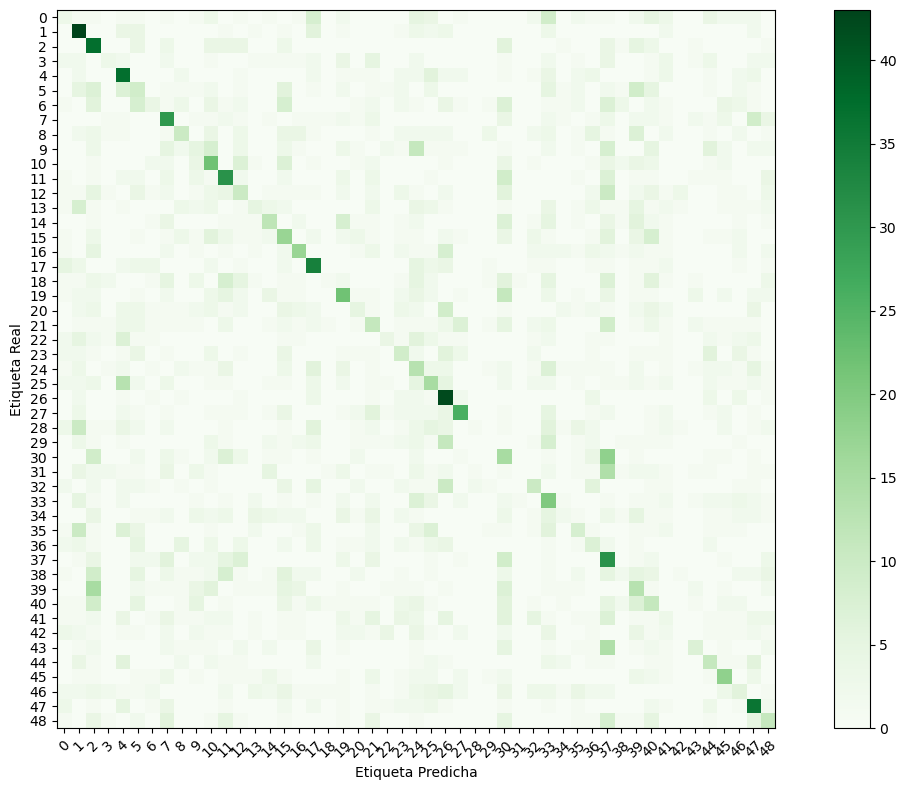

### Resultados en Validation

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.181333 |
| Cross-Entropy | 3.33878  |

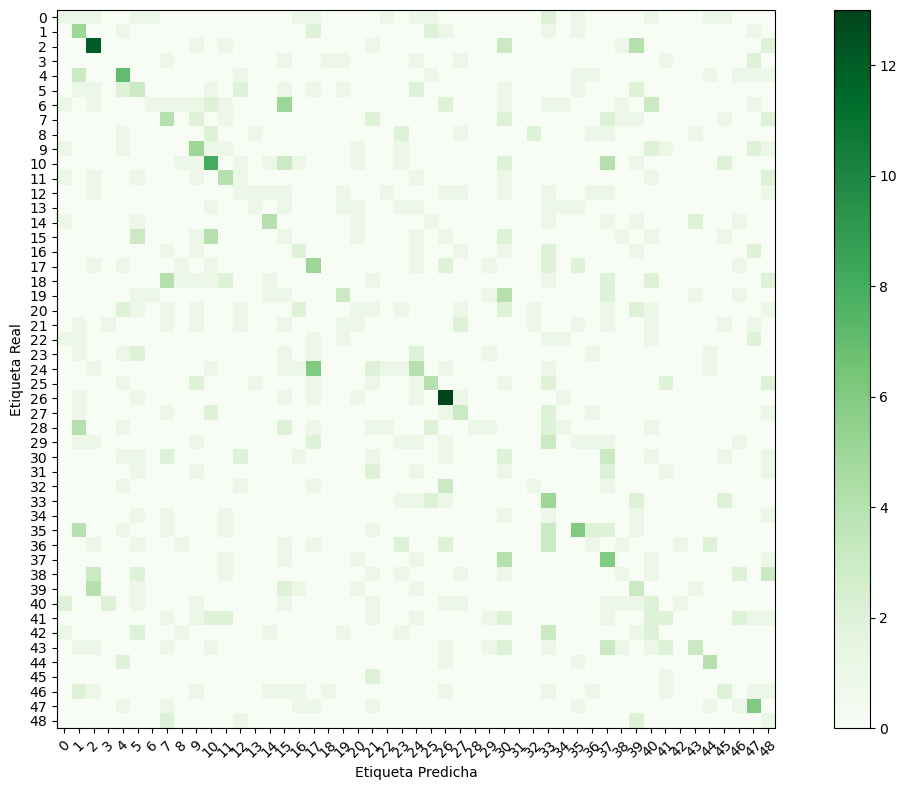

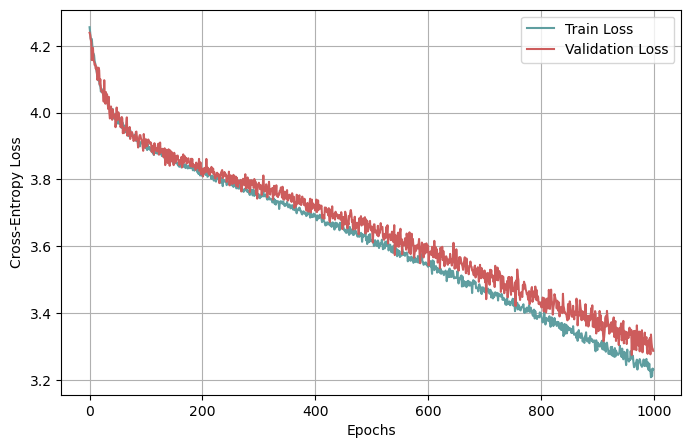

In [28]:
model_dropout = NeuralNetwork(
    layer_sizes=[input_dim, 100, 80, output_dim],
    learning_rate=0.01,
    dropout_rate=0.3  # 30% de neuronas apagadas durante entrenamiento
)

history_dropout = model_dropout.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=1000,
)

evaluate(model_dropout, X_train, y_train_oh,title="Train")
evaluate(model_dropout, X_val, y_val_oh,title="Validation")

plot_loss(history_dropout)


Explorar cambios en la arquitectura de la red (es decir, la cantidad de capas ocultas y unidades ocultas por capa), y los hiperparámetros (cada uno de los items en la lista anterior tiene una serie de parámetros que podemos variar), y determinar la configuración que funcione mejor (menor error de validación). Llamaremos a este modelo M1.

In [ ]:
layers = [X_train.shape[1], 128, 64, 32, num_classes]

from src.utils import grid_search_model_M1

param_grid = {
    "hidden_layers": [
        [32], [64], [128],            # redes chicas
        [64, 32], [128, 64], [256, 128],  # medianas
        [128, 128, 64], [256, 128, 64], [512, 256, 128],  # profundas
        [64, 64, 64], [128, 128, 128], [256, 256, 256]    # simétricas profundas
    ],
    "lr": [0.001, 0.01, 0.05, 0.1], 
    "lambda_reg": [0.001, 0.01],
    "dropout": [0.1, 0.2],
    "scheduler": ["linear", "exponential"],
    "use_adam": [True],
    "batch_size": [16, 32, 64, 128, 256]     # incluí valores más chicos y más grandes
}


best_config, best_history = grid_search_model_M1(param_grid, X_train, y_train_oh, X_val, y_val_oh)

  



🔍 Probing 1920 configurations...

🔧 Running config 1/1920: {'hidden_layers': [32], 'lr': 0.001, 'lambda_reg': 0.001, 'dropout': 0.1, 'scheduler': 'linear', 'use_adam': True, 'batch_size': 16}
✅ Final Val Loss: 1.9824

🔧 Running config 2/1920: {'hidden_layers': [32], 'lr': 0.001, 'lambda_reg': 0.001, 'dropout': 0.1, 'scheduler': 'linear', 'use_adam': True, 'batch_size': 32}
✅ Final Val Loss: 1.9447

🔧 Running config 3/1920: {'hidden_layers': [32], 'lr': 0.001, 'lambda_reg': 0.001, 'dropout': 0.1, 'scheduler': 'linear', 'use_adam': True, 'batch_size': 64}
✅ Final Val Loss: 1.9108

🔧 Running config 4/1920: {'hidden_layers': [32], 'lr': 0.001, 'lambda_reg': 0.001, 'dropout': 0.1, 'scheduler': 'linear', 'use_adam': True, 'batch_size': 128}
✅ Final Val Loss: 1.9802

🔧 Running config 5/1920: {'hidden_layers': [32], 'lr': 0.001, 'lambda_reg': 0.001, 'dropout': 0.1, 'scheduler': 'linear', 'use_adam': True, 'batch_size': 256}
✅ Final Val Loss: 1.9376

🔧 Running config 6/1920: {'hidden_layers': [

Epoch 0: Train Loss = 2.9069, Val Loss = 2.1891, LR = 0.001000
Epoch 10: Train Loss = 0.5079, Val Loss = 1.4927, LR = 0.000599
Epoch 20: Train Loss = 0.2627, Val Loss = 1.4664, LR = 0.000358
Early stopping at epoch 24


### Resultados en Train

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.969429 |
| Cross-Entropy | 0.217389 |

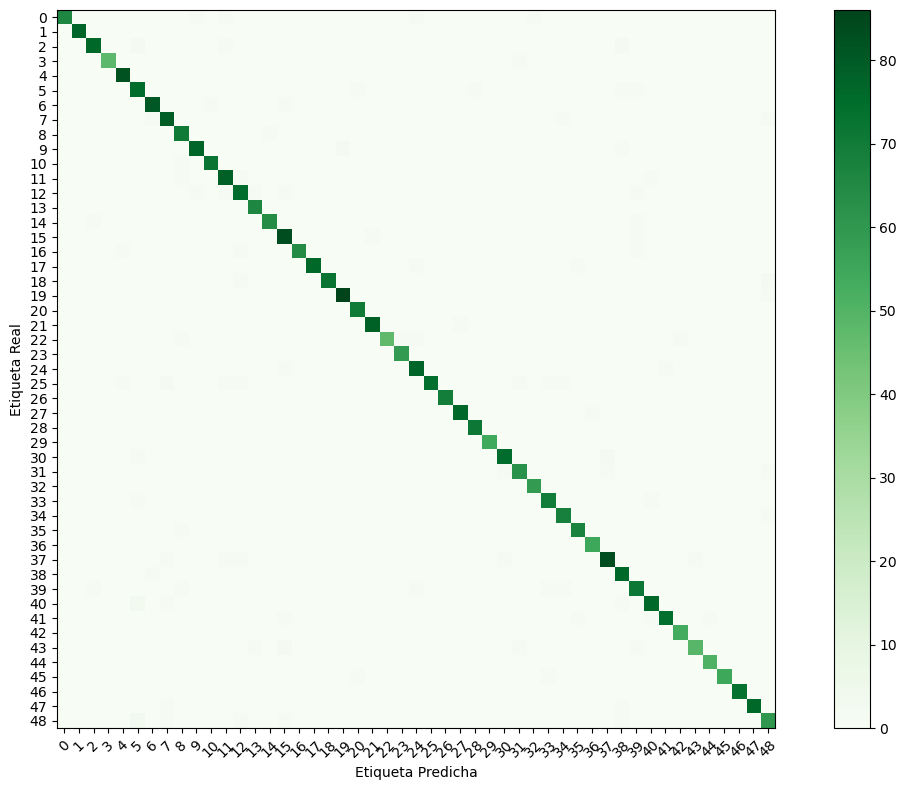

### Resultados en Validation

| Métrica       |   Valor |
|:--------------|--------:|
| Accuracy      | 0.64    |
| Cross-Entropy | 1.50117 |

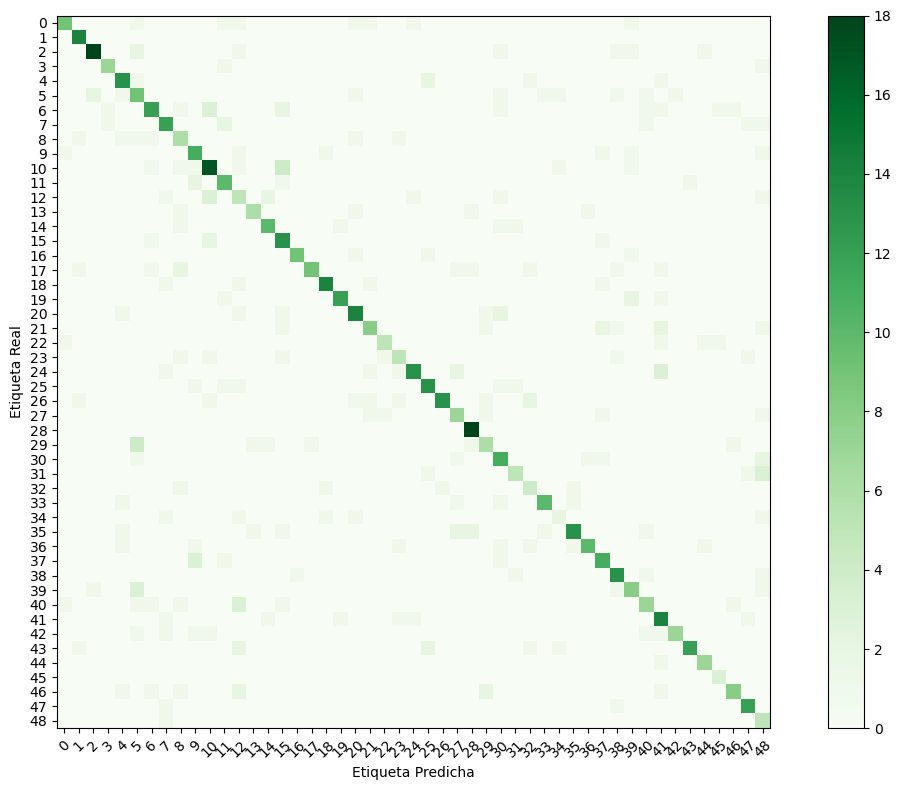

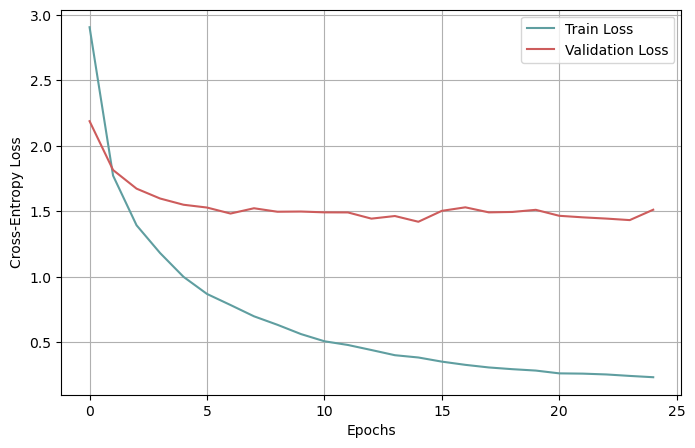

In [29]:
model_M1 = NeuralNetwork(
    layer_sizes=[input_dim,128, output_dim],
    learning_rate=0.001,
    l2_lambda=0.01,
    dropout_rate=0.1,
    use_adam=True,
)
exponential_scheduler = exponential_schedule(model_M1.learning_rate, gamma=0.95)

history_M1 = model_M1.train(
    X_train, y_train_oh,
    X_val, y_val_oh,
    epochs=100,
    batch_size=16,
    use_scheduler=True,
    scheduler_fn=exponential_scheduler,
    early_stopping=True,
    patience=10,
    min_delta=0.0001
)

evaluate(model_M1, X_train, y_train_oh,title="Train")
evaluate(model_M1, X_val, y_val_oh,title="Validation")

plot_loss(history_M1)


### 4. Desarrollo de una Red Neuronal con PyTorch

Utilizando PyTorch, entrenar una red neuronal con la arquitectura y los hiperparámetros hallados en el ejercicio anterior. Llamaremos a este modelo M2.

In [30]:
from src.models_torch import train_model_torch
import torch

Epoch 1 - Train Loss: 3.0802 - Val Loss: 2.3494
Epoch 2 - Train Loss: 2.1210 - Val Loss: 1.9486
Epoch 3 - Train Loss: 1.8730 - Val Loss: 1.8892
Epoch 4 - Train Loss: 1.7382 - Val Loss: 1.8248
Epoch 5 - Train Loss: 1.6552 - Val Loss: 1.7483
Epoch 6 - Train Loss: 1.5936 - Val Loss: 1.7078
Epoch 7 - Train Loss: 1.5298 - Val Loss: 1.6725
Epoch 8 - Train Loss: 1.4858 - Val Loss: 1.6813
Epoch 9 - Train Loss: 1.4774 - Val Loss: 1.6638
Epoch 10 - Train Loss: 1.4364 - Val Loss: 1.6331
Epoch 11 - Train Loss: 1.4139 - Val Loss: 1.6293
Epoch 12 - Train Loss: 1.3998 - Val Loss: 1.5896
Epoch 13 - Train Loss: 1.3646 - Val Loss: 1.6037
Epoch 14 - Train Loss: 1.3537 - Val Loss: 1.5977
Epoch 15 - Train Loss: 1.3436 - Val Loss: 1.5729
Epoch 16 - Train Loss: 1.3054 - Val Loss: 1.5591
Epoch 17 - Train Loss: 1.3025 - Val Loss: 1.5772
Epoch 18 - Train Loss: 1.2810 - Val Loss: 1.5660
Epoch 19 - Train Loss: 1.2765 - Val Loss: 1.5564
Epoch 20 - Train Loss: 1.2536 - Val Loss: 1.5430
Epoch 21 - Train Loss: 1.2511

### Resultados en Train

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.799429 |
| Cross-Entropy | 0.50955  |

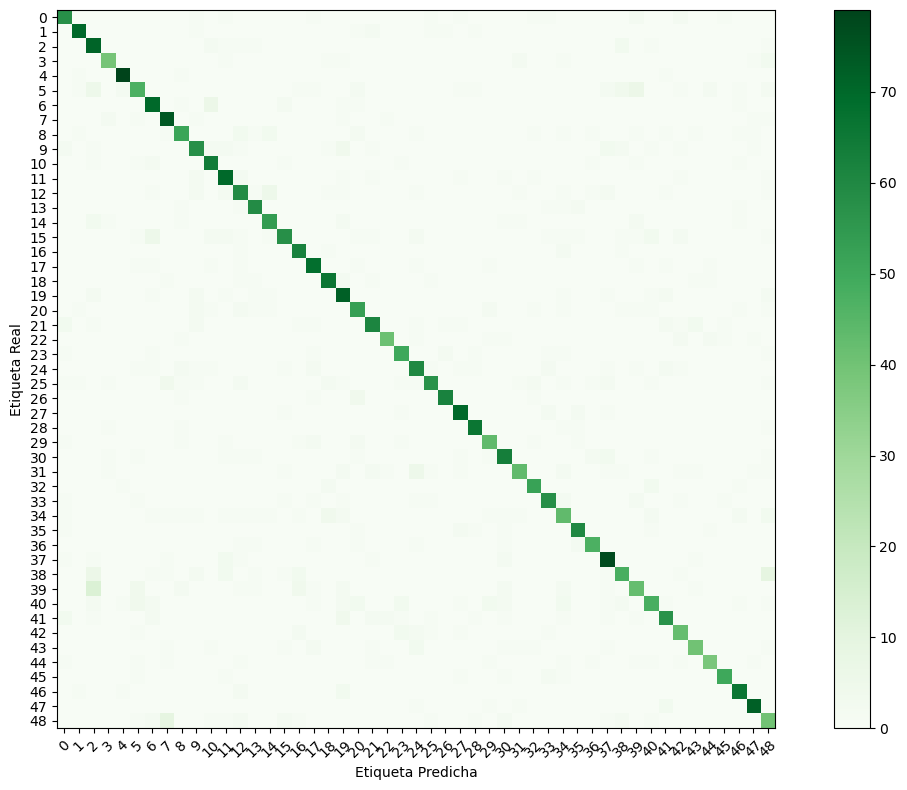

### Resultados en Validation

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.650667 |
| Cross-Entropy | 1.74187  |

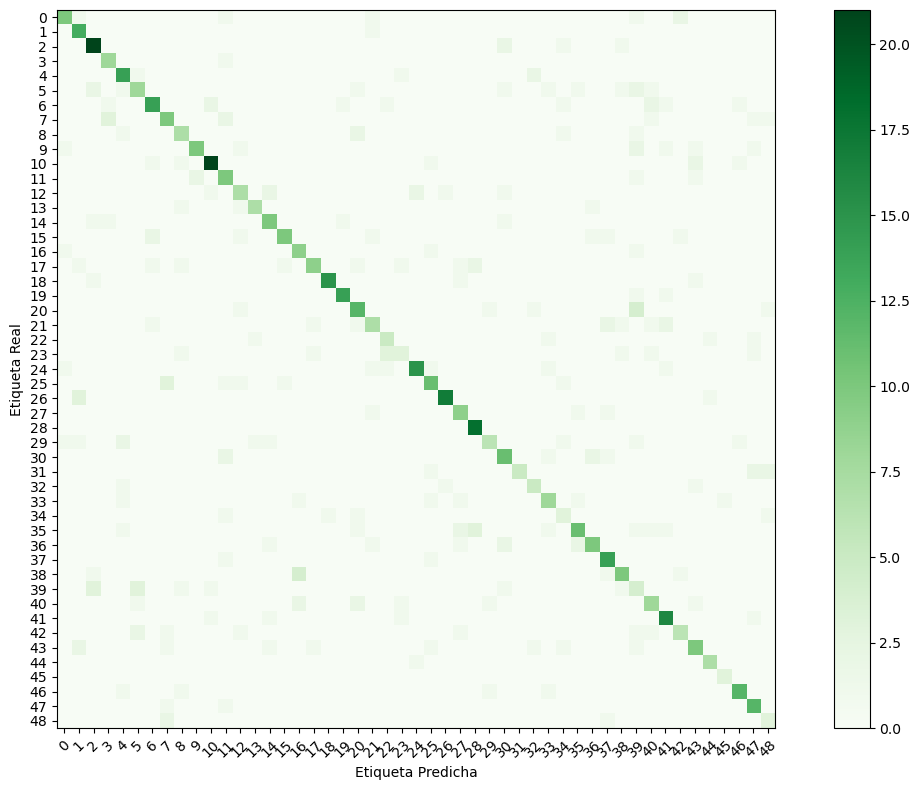

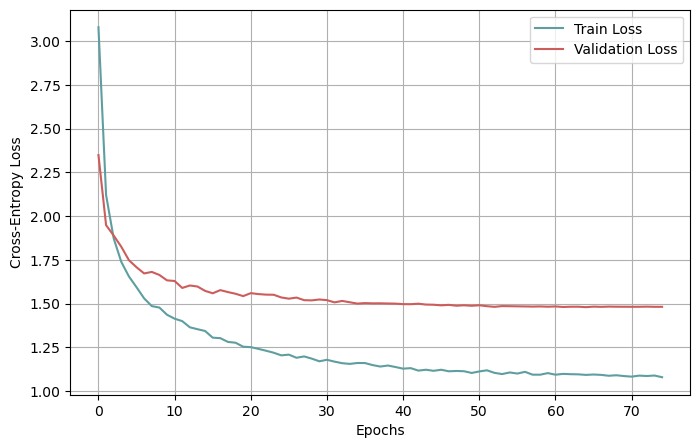

In [31]:
best_config = {
    "hidden_layers": [128],
    "lr": 0.001,
    "lambda_reg": 0.01,
    "dropout": 0.1,
    "scheduler": "exponential",
    "use_adam": True,
    "batch_size": 16
}

model_M2,history_M2 = train_model_torch(
    X_train, y_train_oh, X_val, y_val_oh,
    hidden_layers=best_config["hidden_layers"],
    lr=best_config["lr"],
    batch_size=best_config["batch_size"],
    dropout=best_config["dropout"],
    weight_decay=best_config["lambda_reg"],
    scheduler_type=best_config["scheduler"],
    use_adam=best_config["use_adam"],
    epochs=100,
    patience=10
)

if isinstance(X_train, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32)
if isinstance(X_val, np.ndarray):
    X_val = torch.tensor(X_val, dtype=torch.float32)

model_M2.eval()
evaluate(model_M2, X_train, y_train_oh,title="Train")
model_M2.eval()
evaluate(model_M2, X_val, y_val_oh,title="Validation")

plot_loss(history_M2)


### Utilizando PyTorch, explorar cambios en la cantidad de capas ocultas y unidades ocultas por capa, y determinar la configuración que funcione mejor. LLamaremos a este modelo M3

In [37]:
from src.utils import grid_search_model_torch
param_grid = {
    "hidden_layers": [
    # Capas únicas
    [32], [64], [128], [256], [512], [1024], [2048], [4096], [5000],

    # Dos capas - crecimiento o decrecimiento
    [64, 32], [128, 64], [256, 128], [512, 256], [1024, 512], [2048, 1024],
    [32, 64], [64, 128], [128, 256], [256, 512], [512, 1024], [1024, 2048],

    # Tres capas - decreciente
    [512, 256, 128], [1024, 512, 256], [2048, 1024, 512], [4096, 2048, 1024], [5000, 2048, 1024],

    # Tres capas - creciente
    [128, 256, 512], [64, 128, 256], [32, 64, 128],

    # Tres capas - simétricas
    [64, 64, 64], [128, 128, 128], [256, 256, 256], [1024, 1024, 1024],

    # Cuatro capas - más profundo
    [256, 128, 64, 32], [512, 256, 128, 64], [1024, 512, 256, 128],

    # Muy profundo / sobreajuste posible
    [5000, 5000], [5000, 2048, 1024], [4096, 4096, 4096]
],
    "lr": [0.001],
    "lambda_reg": [0.01],
    "dropout": [0.1],
    "scheduler": ["exponential"],
    "use_adam": [True],
    "batch_size": [16]
}

best_model_M3, best_config_M3, best_history_M3 = grid_search_model_torch(param_grid, X_train, y_train_oh, X_val, y_val_oh)



🔍 Probing 39 configurations...

🔧 Running config 1/39: {'hidden_layers': [32], 'lr': 0.001, 'lambda_reg': 0.01, 'dropout': 0.1, 'scheduler': 'exponential', 'use_adam': True, 'batch_size': 16}
Epoch 1 - Train Loss: 3.4387 - Val Loss: 2.9018
Epoch 2 - Train Loss: 2.6939 - Val Loss: 2.4137
Epoch 3 - Train Loss: 2.3331 - Val Loss: 2.1805
Epoch 4 - Train Loss: 2.1628 - Val Loss: 2.0908
Epoch 5 - Train Loss: 2.0486 - Val Loss: 2.0073
Epoch 6 - Train Loss: 1.9840 - Val Loss: 1.9529
Epoch 7 - Train Loss: 1.9270 - Val Loss: 1.9418
Epoch 8 - Train Loss: 1.9012 - Val Loss: 1.9144
Epoch 9 - Train Loss: 1.8693 - Val Loss: 1.8936
Epoch 10 - Train Loss: 1.8457 - Val Loss: 1.8804
Epoch 11 - Train Loss: 1.8210 - Val Loss: 1.8607
Epoch 12 - Train Loss: 1.8057 - Val Loss: 1.8545
Epoch 13 - Train Loss: 1.7938 - Val Loss: 1.8643
Epoch 14 - Train Loss: 1.7594 - Val Loss: 1.8371
Epoch 15 - Train Loss: 1.7462 - Val Loss: 1.8275
Epoch 16 - Train Loss: 1.7433 - Val Loss: 1.8224
Epoch 17 - Train Loss: 1.7120 - V

In [32]:
best_config_M3 = {
    "hidden_layers": [5000,5000],
    "lr": 0.001,
    "lambda_reg": 0.01,
    "dropout": 0.1,
    "scheduler": "exponential",
    "use_adam": True,
    "batch_size": 16
}
# esta celda esta para no tener que correr el grid search de nuevo

In [33]:
model_M3, history_M3 = train_model_torch(
    X_train, y_train_oh, X_val, y_val_oh,
    # usar best config_M3["hidden_layers"]
    hidden_layers= best_config_M3["hidden_layers"],
    lr = best_config_M3["lr"],
    batch_size= best_config_M3["batch_size"],
    weight_decay = best_config_M3["lambda_reg"],
    dropout= best_config_M3["dropout"],
    use_adam= best_config_M3["use_adam"],
    scheduler_type =best_config_M3["scheduler"],
    epochs=100,
    patience=10,
)

c:\Users\Matteo\Documents\Facultad\tercero\primercuatri\ML\ML\Musacchio_Matteo_TP3\src\models_torch.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
c:\Users\Matteo\Documents\Facultad\tercero\primercuatri\ML\ML\Musacchio_Matteo_TP3\src\models_torch.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ds = TensorDataset(torch.tensor(X_val, dtype=torch.float32),


Epoch 1 - Train Loss: 2.9013 - Val Loss: 2.3885
Epoch 2 - Train Loss: 2.1571 - Val Loss: 2.0324
Epoch 3 - Train Loss: 1.8738 - Val Loss: 1.8324
Epoch 4 - Train Loss: 1.7101 - Val Loss: 1.7216
Epoch 5 - Train Loss: 1.5656 - Val Loss: 1.6661
Epoch 6 - Train Loss: 1.4751 - Val Loss: 1.5944
Epoch 7 - Train Loss: 1.3897 - Val Loss: 1.6597
Epoch 8 - Train Loss: 1.3258 - Val Loss: 1.5538
Epoch 9 - Train Loss: 1.2717 - Val Loss: 1.5664
Epoch 10 - Train Loss: 1.2140 - Val Loss: 1.4692
Epoch 11 - Train Loss: 1.1642 - Val Loss: 1.4306
Epoch 12 - Train Loss: 1.1489 - Val Loss: 1.4939
Epoch 13 - Train Loss: 1.1064 - Val Loss: 1.4855
Epoch 14 - Train Loss: 1.0816 - Val Loss: 1.3687
Epoch 15 - Train Loss: 1.0423 - Val Loss: 1.4465
Epoch 16 - Train Loss: 1.0084 - Val Loss: 1.3614
Epoch 17 - Train Loss: 0.9942 - Val Loss: 1.3495
Epoch 18 - Train Loss: 0.9669 - Val Loss: 1.4086
Epoch 19 - Train Loss: 0.9677 - Val Loss: 1.3755
Epoch 20 - Train Loss: 0.9333 - Val Loss: 1.3834
Epoch 21 - Train Loss: 0.9235

### Resultados en Train

| Métrica       |     Valor |
|:--------------|----------:|
| Accuracy      | 0.906571  |
| Cross-Entropy | 0.0343676 |

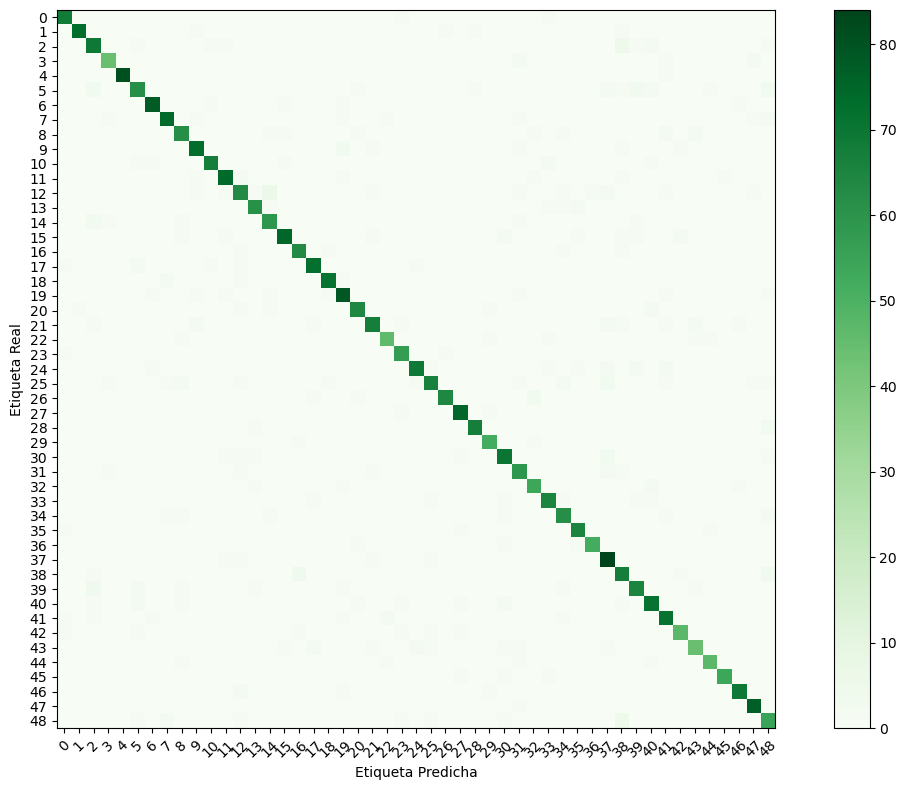

### Resultados en Validation

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.677333 |
| Cross-Entropy | 0.648067 |

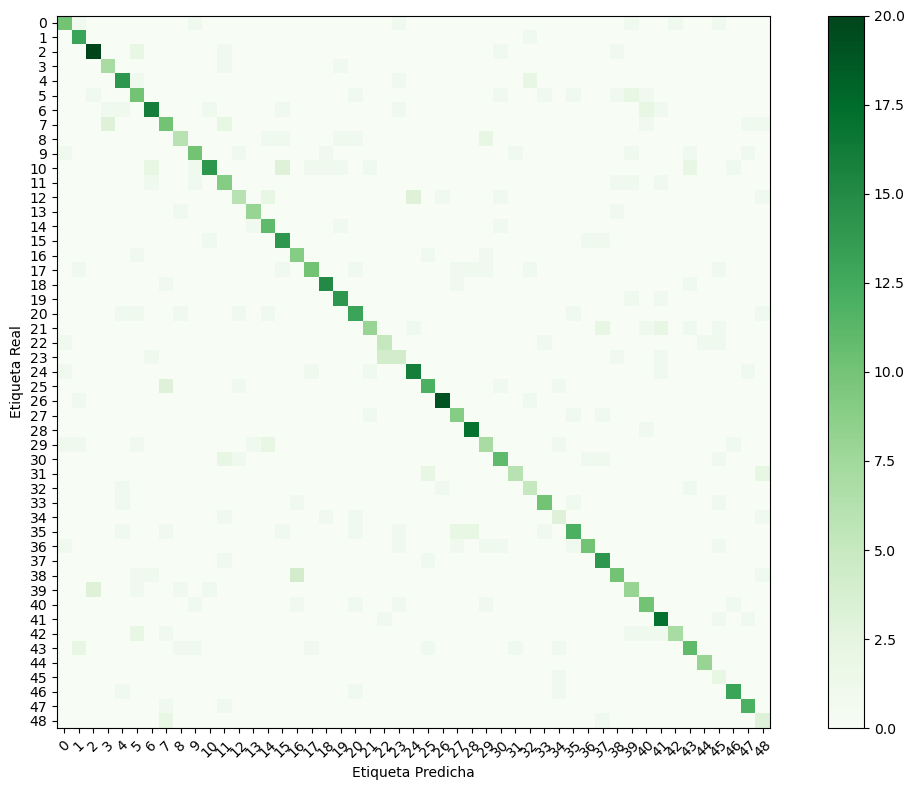

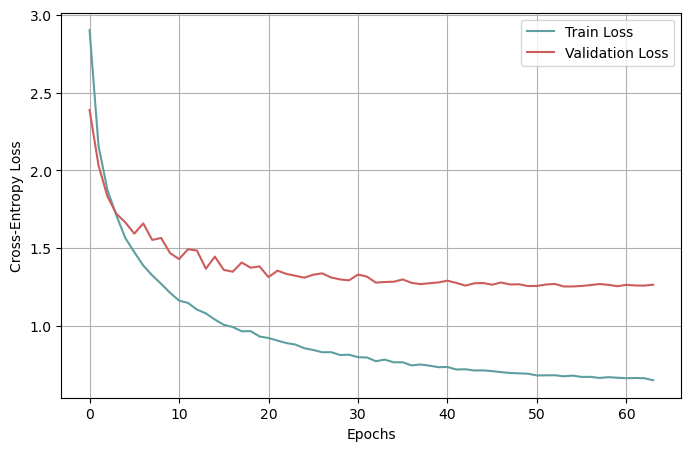

In [34]:

if isinstance(X_train, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32)
if isinstance(X_val, np.ndarray):
    X_val = torch.tensor(X_val, dtype=torch.float32)

model_M3.eval()
evaluate(model_M3, X_train, y_train_oh,title="Train")
model_M3.eval()
evaluate(model_M3, X_val, y_val_oh,title="Validation")
plot_loss(history_M3)

### Utilizando PyTorch, encontrar una arquitectura (capas ocultas y unidades por capa) que produzca overfitting. Llamaremos a este modelo M4.

In [35]:
# printear cantidad total de muestras
print(f"Cantidad total de muestras: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]}")

Cantidad total de muestras: 5000


c:\Users\Matteo\Documents\Facultad\tercero\primercuatri\ML\ML\Musacchio_Matteo_TP3\src\models_torch.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
c:\Users\Matteo\Documents\Facultad\tercero\primercuatri\ML\ML\Musacchio_Matteo_TP3\src\models_torch.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_ds = TensorDataset(torch.tensor(X_val, dtype=torch.float32),


Epoch 1 - Train Loss: 2.4041 - Val Loss: 1.6145
Epoch 2 - Train Loss: 1.1645 - Val Loss: 1.3602
Epoch 3 - Train Loss: 0.6860 - Val Loss: 1.2503
Epoch 4 - Train Loss: 0.3702 - Val Loss: 1.2610
Epoch 5 - Train Loss: 0.2008 - Val Loss: 1.2430
Epoch 6 - Train Loss: 0.1026 - Val Loss: 1.2725
Epoch 7 - Train Loss: 0.0543 - Val Loss: 1.2632
Epoch 8 - Train Loss: 0.0338 - Val Loss: 1.3309
Epoch 9 - Train Loss: 0.0249 - Val Loss: 1.2993
Epoch 10 - Train Loss: 0.0141 - Val Loss: 1.3280
Epoch 11 - Train Loss: 0.0094 - Val Loss: 1.3504
Epoch 12 - Train Loss: 0.0070 - Val Loss: 1.3568
Epoch 13 - Train Loss: 0.0058 - Val Loss: 1.3731
Epoch 14 - Train Loss: 0.0050 - Val Loss: 1.3833
Epoch 15 - Train Loss: 0.0043 - Val Loss: 1.3937
Epoch 16 - Train Loss: 0.0038 - Val Loss: 1.4108
Epoch 17 - Train Loss: 0.0034 - Val Loss: 1.4153
Epoch 18 - Train Loss: 0.0030 - Val Loss: 1.4241
Epoch 19 - Train Loss: 0.0026 - Val Loss: 1.4268
Epoch 20 - Train Loss: 0.0024 - Val Loss: 1.4454
Epoch 21 - Train Loss: 0.0022

### Resultados en Dataset

| Métrica       |      Valor |
|:--------------|-----------:|
| Accuracy      | 1          |
| Cross-Entropy | 0.00814824 |

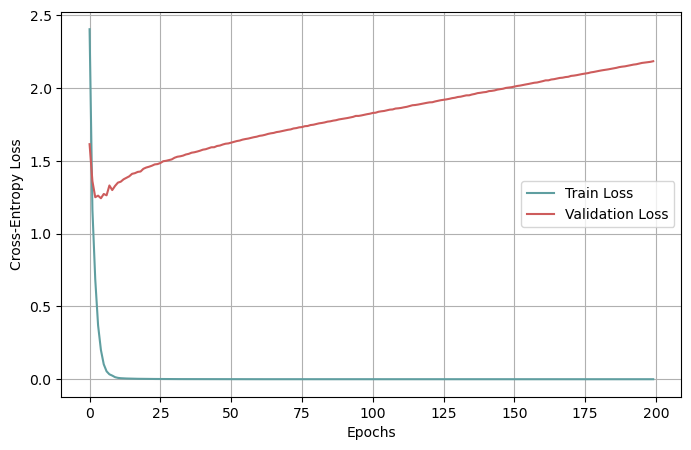

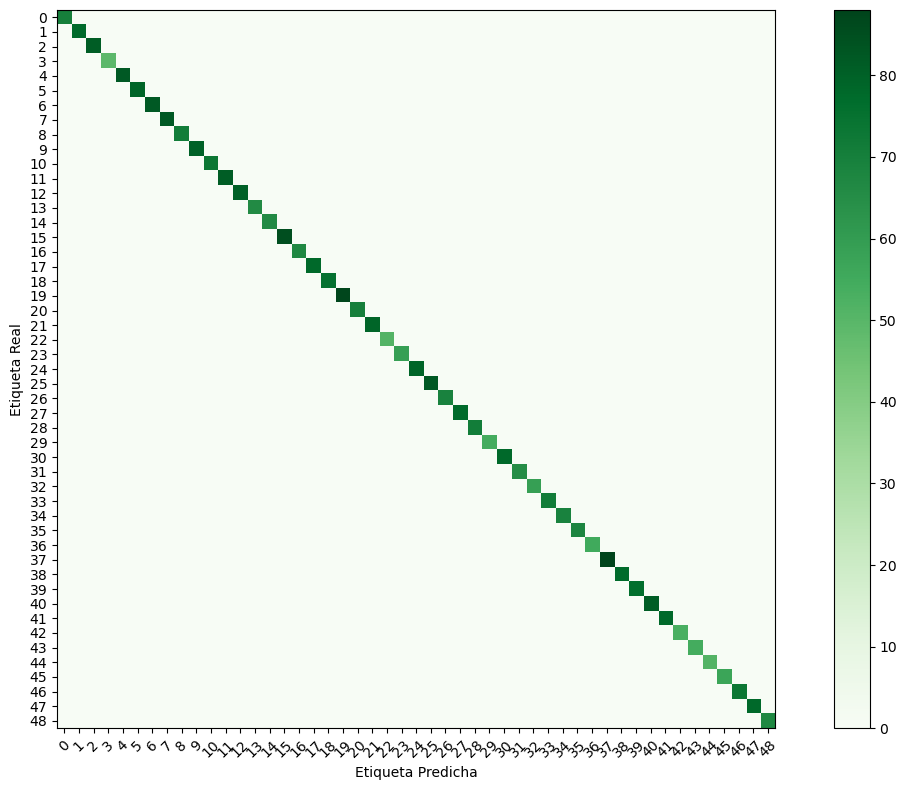

### Resultados en Dataset

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.718667 |
| Cross-Entropy | 8.61064  |

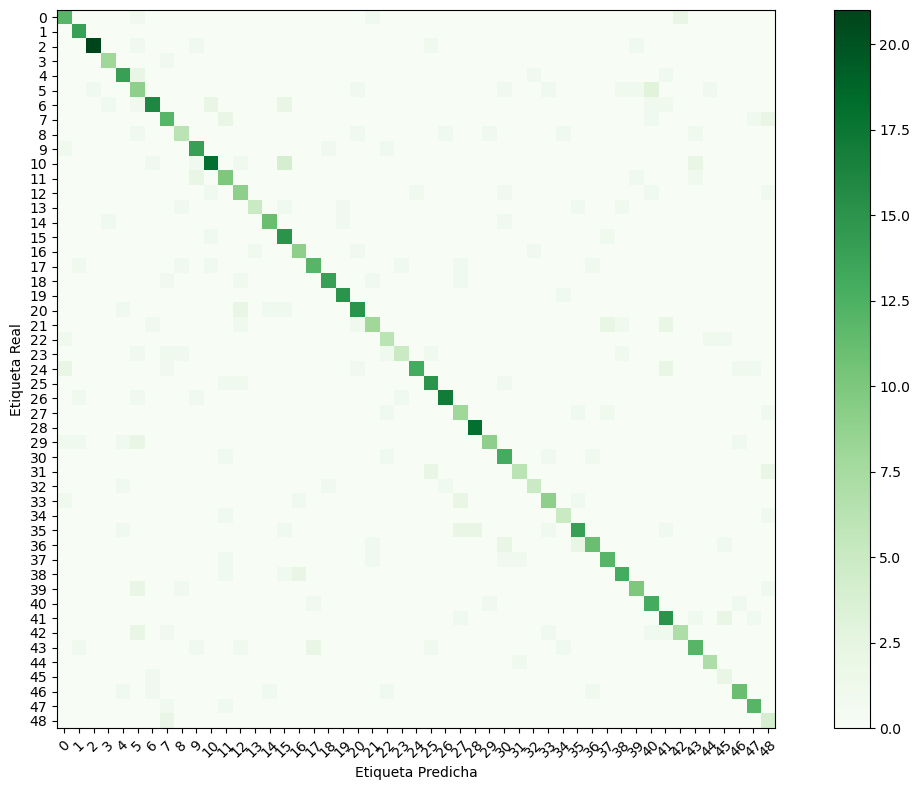

(np.float64(0.7186666666666667),
 8.610643998112685,
 array([[12,  0,  0, ...,  0,  0,  0],
        [ 0, 14,  0, ...,  0,  0,  0],
        [ 0,  0, 21, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 11,  0,  0],
        [ 0,  0,  0, ...,  0, 12,  0],
        [ 0,  0,  0, ...,  0,  0,  4]], shape=(49, 49)))

In [36]:
# Arquitectura grande
hidden_layers = [5000]

if isinstance(X_train, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32)
if isinstance(X_val, np.ndarray):
    X_val = torch.tensor(X_val, dtype=torch.float32)

# Entrenamiento sin ninguna regularización
model_m4, history_m4 = train_model_torch(
    X_train, y_train_oh,
    X_val, y_val_oh,
    hidden_layers=hidden_layers,
    lr=0.001,
    epochs=200,   # Más largo para que sobreentrene
    patience=0
)

plot_loss(history_m4)
model_m4.eval()
evaluate(model_m4, X_train, y_train_oh)
model_m4.eval()
evaluate(model_m4, X_val, y_val_oh)



### Comparar la performance sobre el conjunto de test de los siguientes cinco modelos

### Resultados en Test - Model M0

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.574667 |
| Cross-Entropy | 1.74854  |

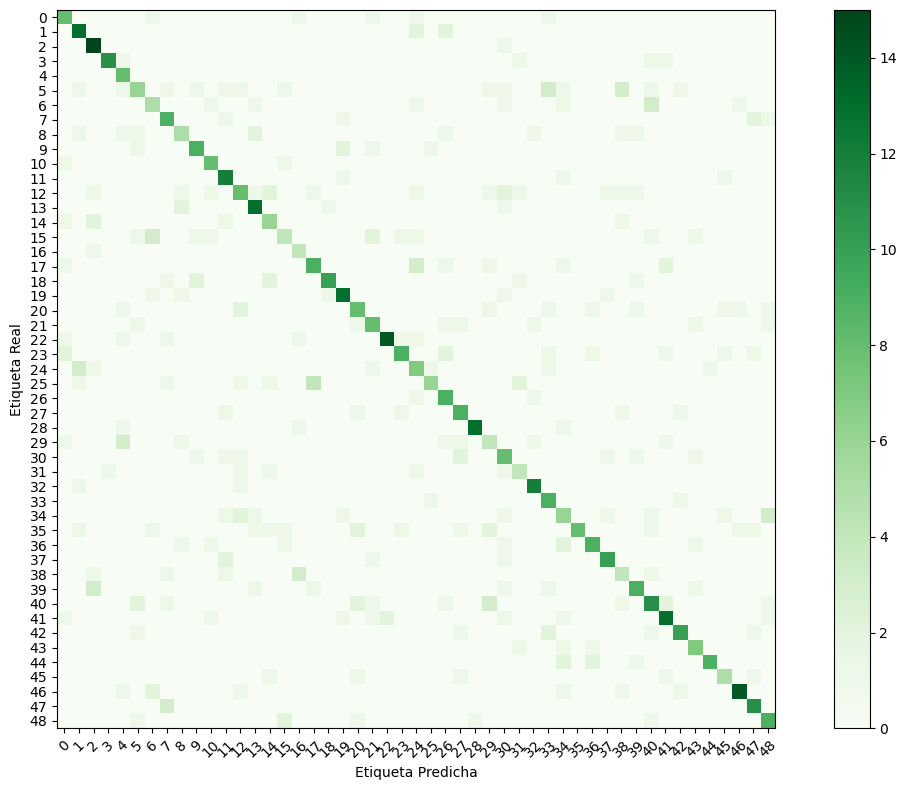

### Resultados en Test - Model M1

| Métrica       |   Valor |
|:--------------|--------:|
| Accuracy      | 0.6     |
| Cross-Entropy | 1.75882 |

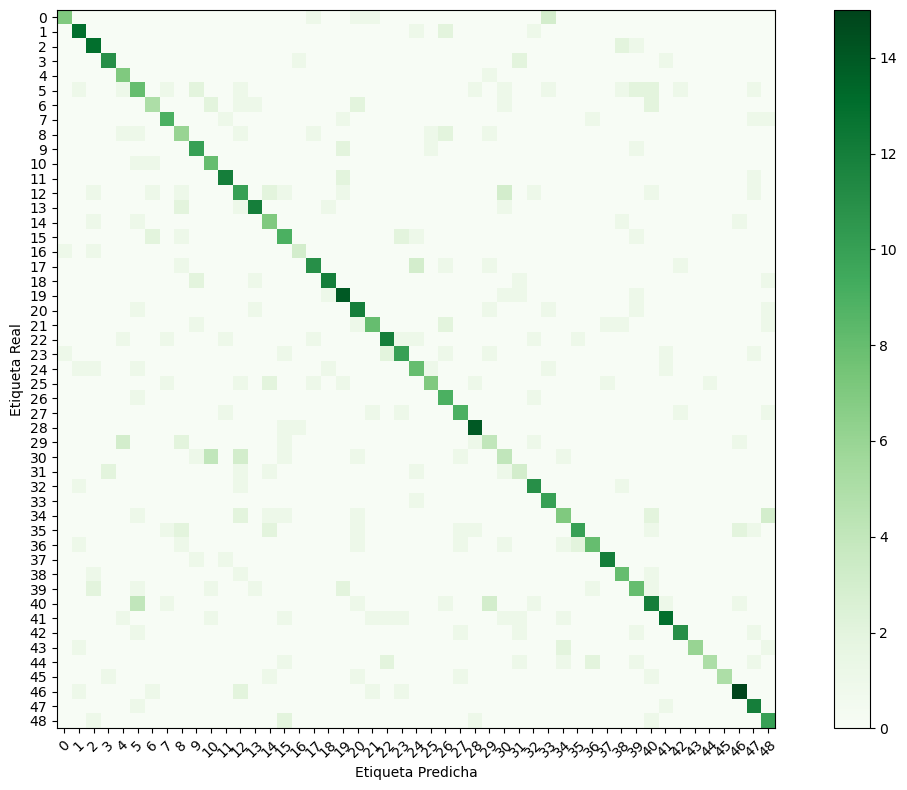

### Resultados en Test - Model M2

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.610667 |
| Cross-Entropy | 1.77803  |

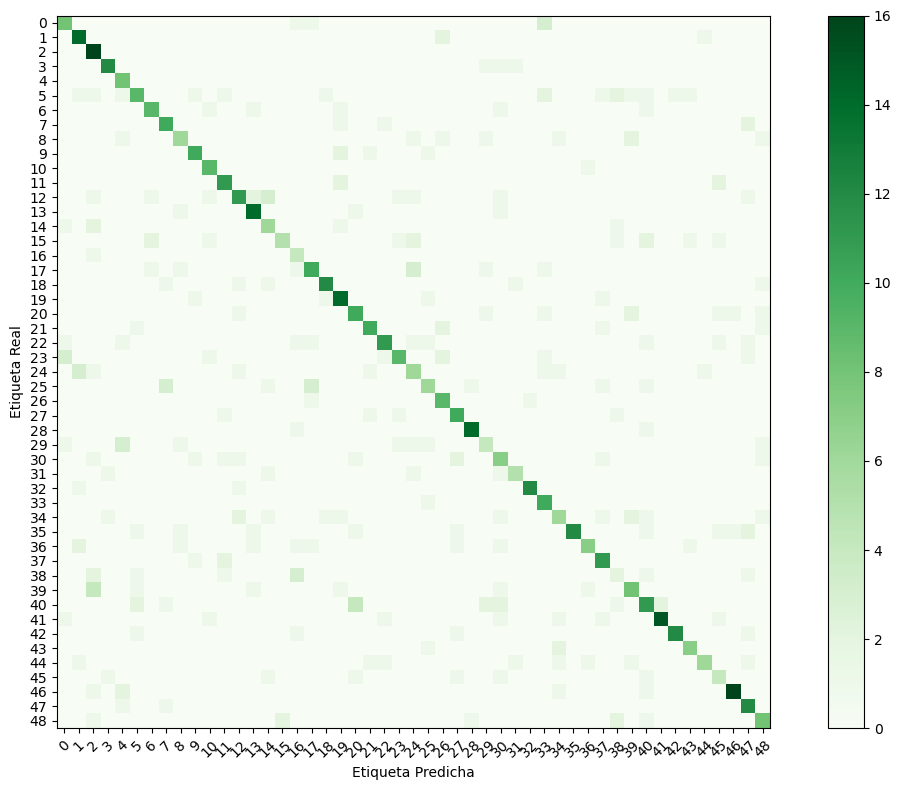

### Resultados en Test - Model M3

| Métrica       |    Valor |
|:--------------|---------:|
| Accuracy      | 0.637333 |
| Cross-Entropy | 0.899009 |

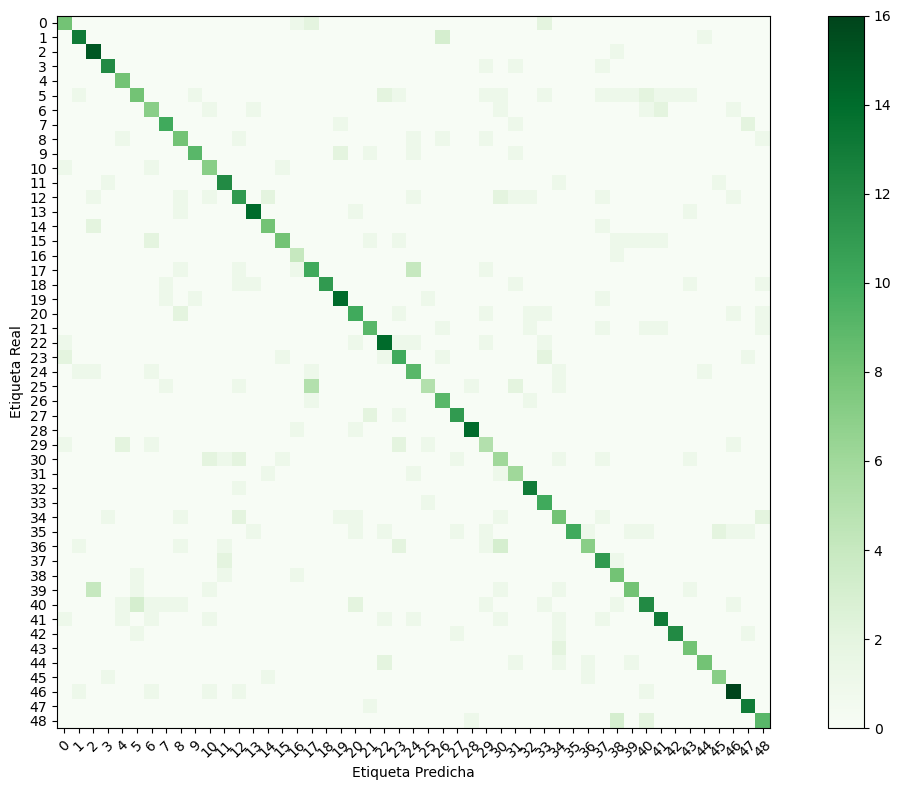

### Resultados en Test - Model M4

| Métrica       |   Valor |
|:--------------|--------:|
| Accuracy      | 0.704   |
| Cross-Entropy | 9.84029 |

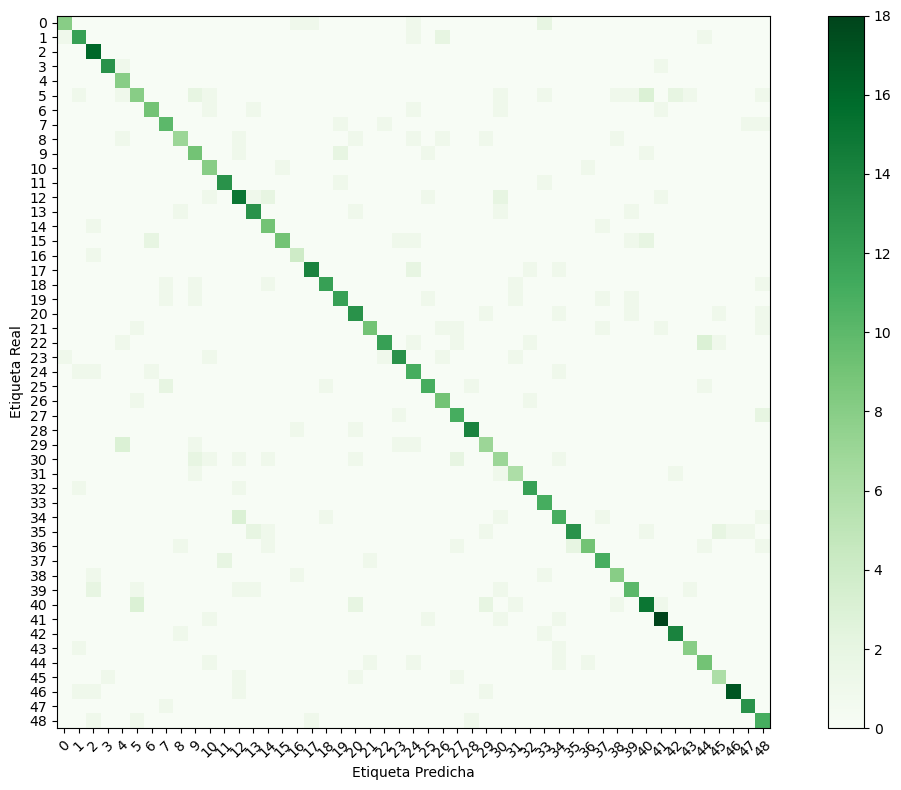

(np.float64(0.704),
 9.840291228106866,
 array([[ 8,  0,  0, ...,  0,  0,  0],
        [ 1, 12,  0, ...,  0,  0,  0],
        [ 0,  0, 16, ...,  0,  0,  0],
        ...,
        [ 0,  1,  1, ..., 17,  0,  0],
        [ 0,  0,  0, ...,  0, 13,  0],
        [ 0,  0,  1, ...,  0,  0, 11]], shape=(49, 49)))

In [37]:
# Convertir X_test a tensor si es necesario
y_test = one_hot_encode(y_test, num_classes)

# Evaluar los modelos en el conjunto de prueba
evaluate(model_M0, X_test, y_test, title="Test - Model M0")
evaluate(model_M1, X_test, y_test, title="Test - Model M1")
if isinstance(X_test, np.ndarray):
    X_test = torch.tensor(X_test, dtype=torch.float32)
model_M2.eval()
evaluate(model_M2, X_test, y_test, title="Test - Model M2")
model_M3.eval()
evaluate(model_M3, X_test, y_test, title="Test - Model M3")
model_m4.eval()
evaluate(model_m4, X_test, y_test, title="Test - Model M4")

### 5. Desafío

Utilizando el modelo que considere que sea el mejor, predecir las probabilidades a-posteriori de cada clase del dataset X_COMP.npy y generar un archivo .csv con las predicciones llamado Apellido_Nombre_predicciones.csv. El archivo predicciones.csv debe tener una fila por muestra y las columnas deben ser las probabilidades a posteriori de cada clase.

In [38]:
# 1. Cargar el dataset de competencia
X_comp = np.load("X_COMP.npy")
X_comp = X_comp / 255.0

# 2. Asegurarte de que esté en formato tensor
X_comp_tensor = torch.tensor(X_comp, dtype=torch.float32)

# 3. Pasar el modelo a modo evaluación
model_M3.eval()

# 4. Hacer la predicción de probabilidades
with torch.no_grad():
    y_pred_proba = model_M3(X_comp_tensor)
    probs = torch.softmax(y_pred_proba, dim=1).cpu().numpy()

# 5. Crear DataFrame y guardar en CSV
df_preds = pd.DataFrame(probs)
df_preds.to_csv("Musacchio_Matteo_predicciones.csv", index=False)


Uso el modelo M3 porque fue el que me parecio mejor

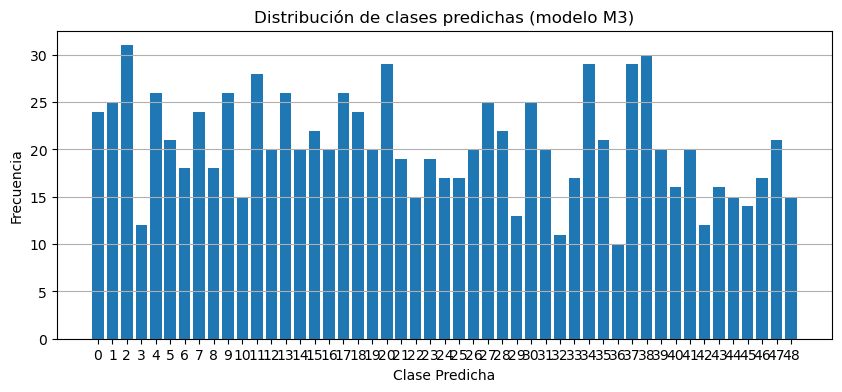

In [39]:
import numpy as np
df = pd.read_csv("Musacchio_Matteo_predicciones.csv")
pred_clases = df.values.argmax(axis=1)

plt.figure(figsize=(10, 4))
plt.hist(pred_clases, bins=np.arange(df.shape[1]+1)-0.5, rwidth=0.8)
plt.xlabel("Clase Predicha")
plt.ylabel("Frecuencia")
plt.title("Distribución de clases predichas (modelo M3)")
plt.xticks(np.arange(df.shape[1]))
plt.grid(axis='y')
plt.show()